# Student Info

## Name: Arvin Esmaili
## ID: 99112114

This exercise has been done using hints and some code snippets from EDA Titanic and Titanic Modeling python notebooks.
Some small hints and helps from documentations of libraries have been taken into the process.
Every section that has been implemented/not implemented in this notebook either has a reason or it has no benefit from auhtor's view.
Description of them problem and Data has been acquired from: https://quera.ir/course/assignments/28694/problems.

# Step 1: Define the Problem



### Section Info

This problem is about a bank whose management wants to explore ways of converting its liability customers to personal loan customers. A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

Your job is to do EDA and build a classification model to predict whether a customer accepts the Personal Loan or not

# Step 2: Gather the Data


### Section Info

The file train_data.csv contains data on 4500 customers. You can download the file from here: https://www.dropbox.com/s/pt6bleedtpo3h5c/train_data.csv?dl=0 The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (yes/no). Among these customers, only about 9% accepted the personal loan that was offered to them in the earlier campaign.

# Step 3: Prepare Data for Consumption


### Section Info

Since step 2 was provided to us on a golden plater, so is step 3. Therefore, normal processes in data wrangling, such as data architecture, governance, and extraction are out of scope. Thus, only data cleaning is in scope.

## 3.1 Import Libraries

In [1]:
# load packages
import sys
import pandas as pd
import matplotlib 
import numpy as np 
import scipy as sp 
import sklearn 

# misc libraries
import random
import time


### Section Info

The following code is written in Python 3.x. Libraries provide pre-written functionality to perform necessary tasks. The idea is why write ten lines of code, when you can write one line. 

## 3.1.1 Load Data Modelling Libraries


In [2]:
# Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

# Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure Visualization Defaults

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 6,4
%config InlineBackend.figure_format='retina'

### Section Info

We will use the popular *scikit-learn* library to develop our machine learning algorithms. In *sklearn,* algorithms are called Estimators and implemented in their own classes. For data visualization, we will use the *matplotlib* and *seaborn* library. Below are common classes to load.

## 3.2 Meet and Greet Data

### Read csv data

In [3]:
data_raw = pd.read_csv("./train_data.csv")

In [4]:
data_raw.head(20) 

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0    784   44          20     160     94606       2    7.6          1   
1   1314   52          27      78     92008       4    3.6          3   
2    184   29           3     148     92173       3    4.1          1   
3    102   61          36      30     94608       3    1.3          2   
4   3202   28           3      81     92121       4    0.2          1   
5   4769   38          14      39     93118       1    2.0          2   
6    659   52          26      35     91711       3    0.9          3   
7   1024   45          20     109     94117       1    7.0          1   
8   2422   43          19      40     94949       3    0.6          2   
9   2631   63          37     113     94611       4    1.7          3   
10  1502   30           4      35     92130       2    0.3          2   
11  3213   61          35      59     92697       1    2.8          2   
12  1804   58          32      59     94542       1    1.6          1   
13   991   34          10      81     94002       4    3.4          1   
14  3038   27           2     158     95060       3    0.4          2   
15  1623   39          14      24     94611       2    0.3          2   
16   247   38          14      60     94025       2    0.6          3   
17  3608   41          15      62     90401       3    0.9          3   
18  1130   30           4      73     94305       3    3.3          1   
19  1689   60          34     108     92152       2    2.0          1   

    Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0          0              0                   1           0       0   
1        141              0                   0           0       1   
2          0              1                   0           0       1   
3          0              0                   0           0       0   
4          0              0                   0           0       0   
5          0              0                   0           0       1   
6          0              0                   0           0       0   
7        366              0                   0           0       1   
8          0              0                   0           0       1   
9          0              0                   0           0       1   
10         0              0                   1           0       0   
11         0              0                   0           0       0   
12         0              0                   0           0       1   
13         0              0                   0           0       1   
14         0              1                   0           1       1   
15         0              0                   0           0       1   
16         0              0                   0           0       1   
17         0              0                   0           0       0   
18         0              1                   0           1       1   
19       359              0                   0           0       1   

    CreditCard  
0            0  
1            0  
2            0  
3            0  
4            0  
5            0  
6            0  
7            0  
8            0  
9            1  
10           1  
11           0  
12           0  
13           0  
14           0  
15           0  
16           1  
17           0  
18           1  
19           0

In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4500 non-null   int64  
 1   Age                 4500 non-null   int64  
 2   Experience          4500 non-null   int64  
 3   Income              4500 non-null   int64  
 4   ZIP Code            4500 non-null   int64  
 5   Family              4500 non-null   int64  
 6   CCAvg               4500 non-null   float64
 7   Education           4500 non-null   int64  
 8   Mortgage            4500 non-null   int64  
 9   Personal Loan       4500 non-null   int64  
 10  Securities Account  4500 non-null   int64  
 11  CD Account          4500 non-null   int64  
 12  Online              4500 non-null   int64  
 13  CreditCard          4500 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 492.3 KB


### Section Info

This is the meet and greet step. Get to know your data and learn a little bit about it. What does it look like (datatype and values), what makes it tick (independent/feature variables(s)), what's its goals (dependent/target variable(s)).

- CSV file is read as Pandas Data Frame and saved in a variable for further use
- First 20 rows of data is presented to observe the structure and variable types in DataFrame
- Info of dataset is extracted to check columns, non-null columns and their data types

Here are the info of columns from description :

- ID: Customer ID
- Age: Customer's age in completed years
- Experience: Number of years of professional experience
- Income: Annual income of the customer ($000)
- ZIP Code: Home Address ZIP code.
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month ($000)
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any. ($000)
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- CreditCard: Does the customer use a credit card issued by this Bank?

This proves the correctness of data types as it matches the contxt given in description. 
Also the number of non-null rows for each column proves that no missing data is found by .info() method.
ID column is an extra column in this dataset which should be removed in the process.
Age, Experience, Income, Zipcode, CCAvg and Mortgage are Numerical data types.
however Family, Education, Personal Loan(Target Feature), Securities Account, CD Account, Online and CreditCard are categorical data types.

## 3.2.1 Check for Missing Values

In [6]:
for feature in data_raw.columns:
    print(feature + ": " + str(len(data_raw[data_raw[feature].isnull()])))

ID: 0
Age: 0
Experience: 0
Income: 0
ZIP Code: 0
Family: 0
CCAvg: 0
Education: 0
Mortgage: 0
Personal Loan: 0
Securities Account: 0
CD Account: 0
Online: 0
CreditCard: 0


### Section Info
Checking for null data with self-implemented method proved that there are no null values.
This has been done again to make sure .info() method provided correct info for null values. 

## 3.2.2 Check for Invalid Values

### Numerical Features

In [7]:

print("Invalid Ages:")
print(len(data_raw[data_raw['Age'] <= 0]))

print("Invalid Experience:")
print(len(data_raw[data_raw['Experience'] < 0]))

print("Invalid Incomes:")
print(len(data_raw[data_raw['Income'] < 0]))

print("Family:")
print(len(data_raw[data_raw['Family'] <= 0]))

print("CCAvg:")
print(len(data_raw[data_raw['CCAvg'] < 0]))

print("Invalid Mortgage:")
print(len(data_raw[data_raw['Mortgage'] < 0]))



Invalid Ages:
0
Invalid Experience:
48
Invalid Incomes:
0
Family:
0
CCAvg:
0
Invalid Mortgage:
0


### Categorical Features

In [8]:
print('Education' + ':\n' + str(len(data_raw[~data_raw['Education'].isin([1,2,3])])))
feature_list = ["Personal Loan", "Securities Account", "CD Account", "Online", "CreditCard"]
for feature in feature_list:
    print(feature + ':\n' + str(len(data_raw[~data_raw[feature].isin([0,1])])))

Education:
0
Personal Loan:
0
Securities Account:
0
CD Account:
0
Online:
0
CreditCard:
0


### Invalid Experience with Personal Loan = 1

In [9]:
print(len(data_raw[(data_raw['Experience'] < 0) & (data_raw['Personal Loan'] == 1)]))

0


### (Age < Experience) Invalidity

In [10]:
len(data_raw[data_raw['Age'] <= data_raw['Experience']])

0

### Section Info

- Numerical features checked for invalid values. Experience feature had 48 invalid values which were negative values. it is clear that Years of Experience cannot be negative.
- Categorical features checked for invalid values.
- Checked to see how many invalid Experience values had the Personal Loan value equal to 1 to see if they had any effects on positive answers (1s) but they all had Personal Loan equal to 0 which means removing them from dataset might not hurt the final answer of classifiers alot.
- Checked for the condition where Age is less than Experience which is invalid. Luckily all Ages were greater than Experiences. 

## 3.2.3 Distributions

In [11]:
feature_list = ["Education", "Personal Loan", "Securities Account", "CD Account", "Online", "CreditCard"]
for feature in feature_list:
    print(data_raw.groupby(feature).count())
    print("______________________________________________________________________________")
    print()

             ID   Age  Experience  Income  ZIP Code  Family  CCAvg  Mortgage  \
Education                                                                      
1          1886  1886        1886    1886      1886    1886   1886      1886   
2          1259  1259        1259    1259      1259    1259   1259      1259   
3          1355  1355        1355    1355      1355    1355   1355      1355   

           Personal Loan  Securities Account  CD Account  Online  CreditCard  
Education                                                                     
1                   1886                1886        1886    1886        1886  
2                   1259                1259        1259    1259        1259  
3                   1355                1355        1355    1355        1355  
______________________________________________________________________________

                 ID   Age  Experience  Income  ZIP Code  Family  CCAvg  \
Personal Loan                                     

### Section Info

Distribution of categorical values checked to see the distribution of each category item numerically.

- by not a big margin, most of customers have level 1 education type which means they are not well educated. least distribution is for level 2 education.
- Number of people who accepted Personal Loan (Target Feature) is almost 1/10 of all customers. Not many customers needed or accepted Personal Loans
- Same figures seem to be true for Securities Accounts.
- CD Accounts are significantly less needed by customers. Approximately only 1/15 of customers needed Securities Accounts.
- Online services on the other hand are much popular and 2/3 of customers use online services. The obvious reason to that is online services cut the costs as time, money and energy.
- CreditCards have approximately 1/4 of the share of customers. 

# Step 4: Visualization

## 4.1 Histogram

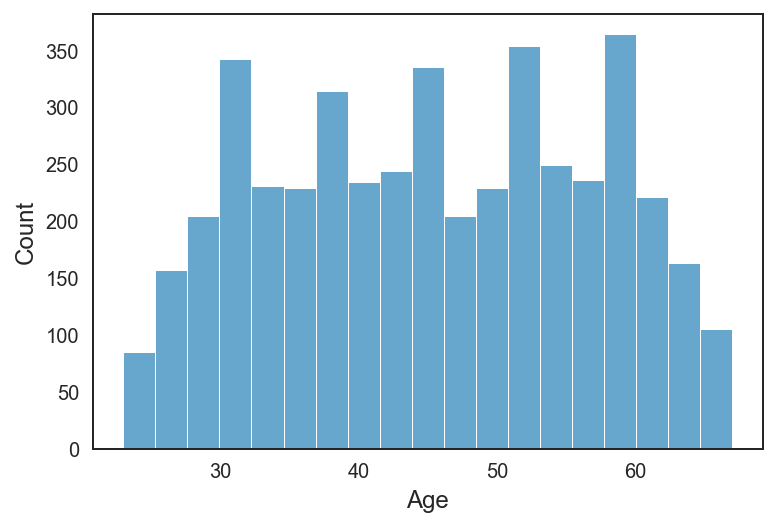

In [12]:
sns.histplot(x='Age', data=data_raw);

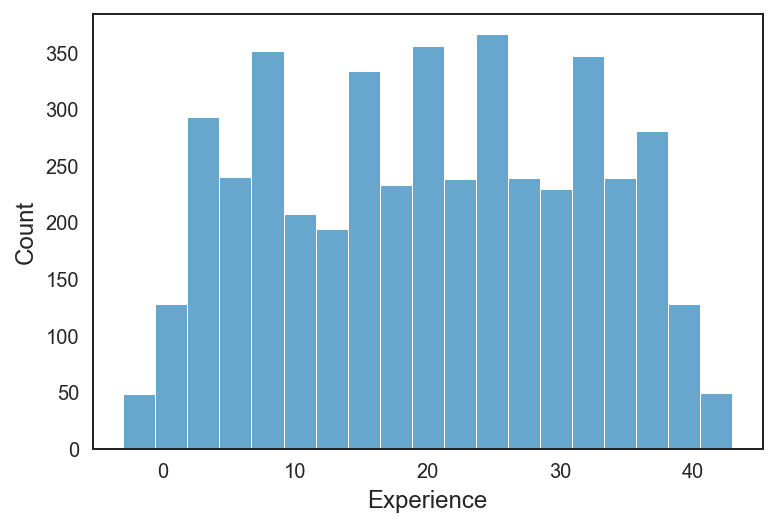

In [13]:
sns.histplot(x='Experience', data=data_raw);

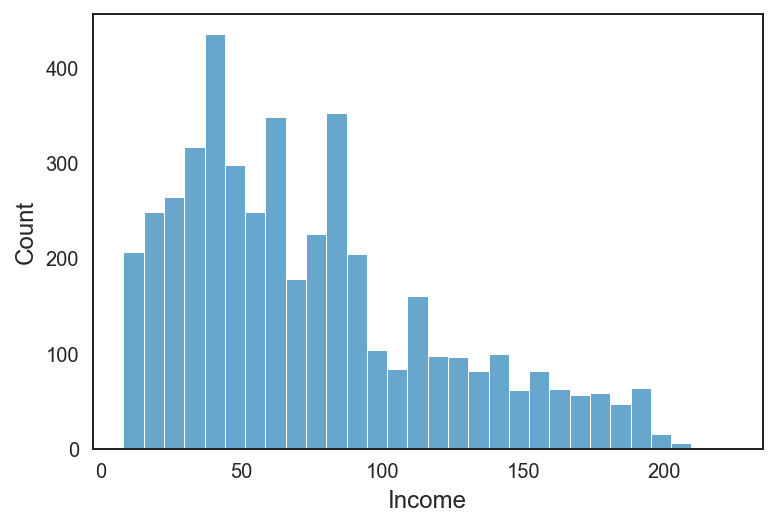

In [14]:
sns.histplot(x='Income', data=data_raw);

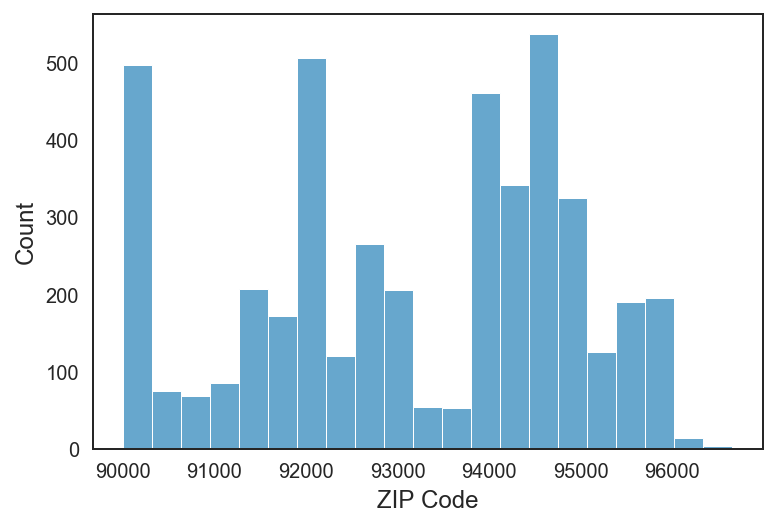

In [15]:
sns.histplot(x='ZIP Code', data=data_raw);

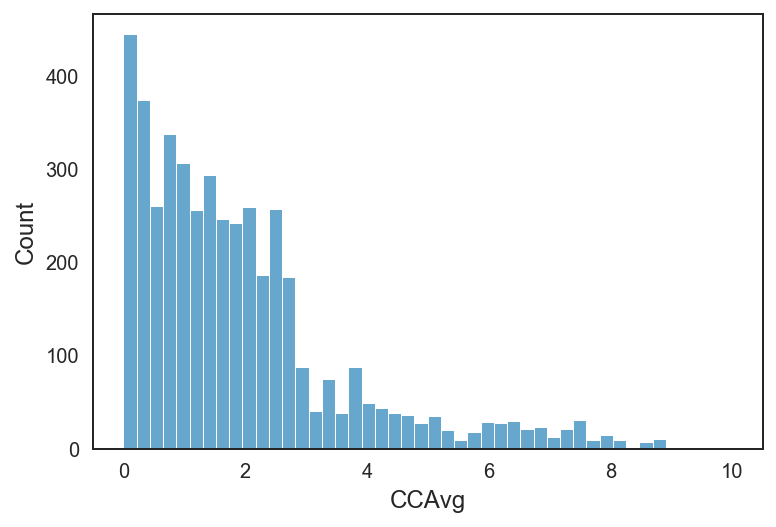

In [16]:
sns.histplot(x='CCAvg', data=data_raw);

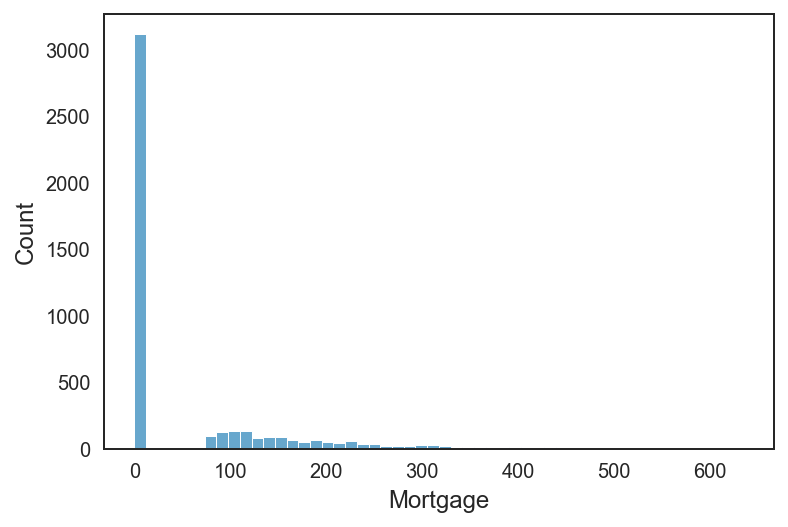

In [17]:
sns.histplot(x='Mortgage', data=data_raw);

### Section Info

Checked distribution of Numerical Featurs.

- most of customers have the age between 25 to 65.
- most customers have years of experience range from 5 to 35. Invalid negative Experience values are even presented in plot.
- most Incomes are between 12k to 90k per year. The rest are distributed between 90k to 200k with decreasing order.
- Binning of Zipcodes on the plot is not very clear, but as it seems areas with 90XXX, 92XXX and 94XXX zipcodes contain more customers than other zipcodes.
- Most of CCAvg are distributed between 0 and 3. the rest which are significantly less, are deistributed between 3 and 9. having lots of 0k spend on credit cards is logical as not so many of customers have credit cards.
- Mortgage values are mostly 0. that's why 0 bar is very tall. This presents the fact that most of customers either own no house, or the house is not under mortgage. The other values are from 70k to 350k. So there is a huge gap from 0 to 70k which is identical to the fact that it is house mortgage.

## 4.2 Countplot

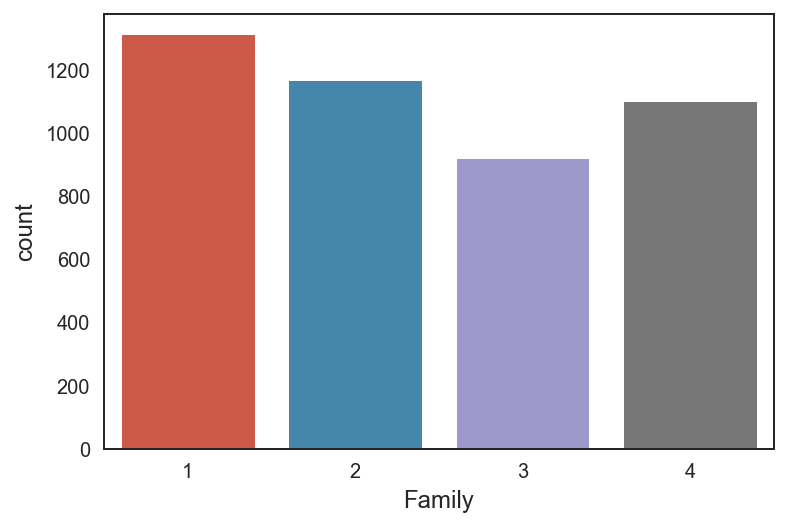

In [18]:
sns.countplot(x='Family', data=data_raw);

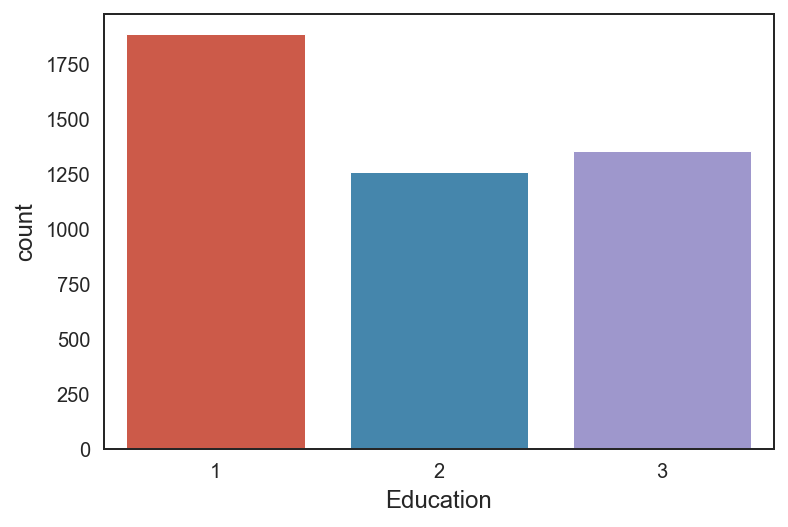

In [19]:
sns.countplot(x='Education', data=data_raw);

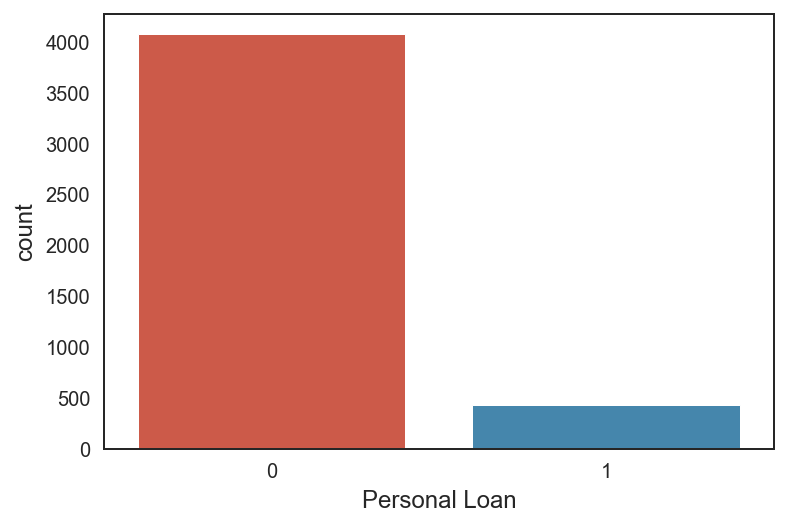

In [20]:
sns.countplot(x='Personal Loan', data=data_raw);

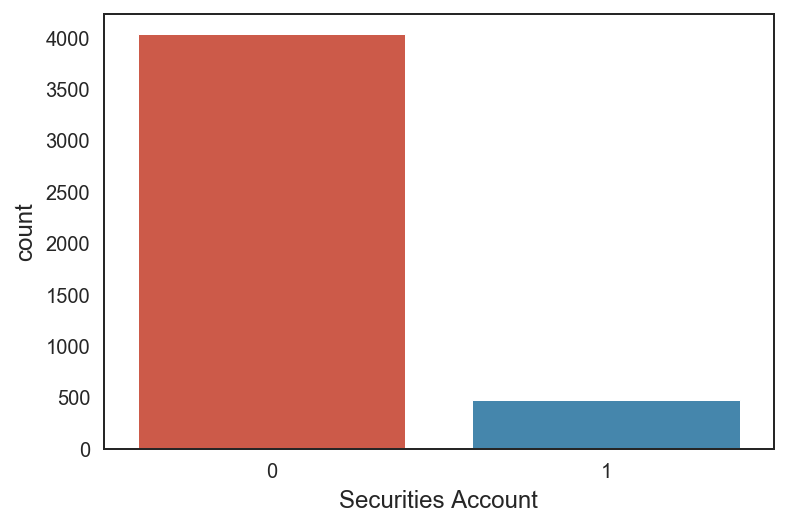

In [21]:
sns.countplot(x='Securities Account', data=data_raw);

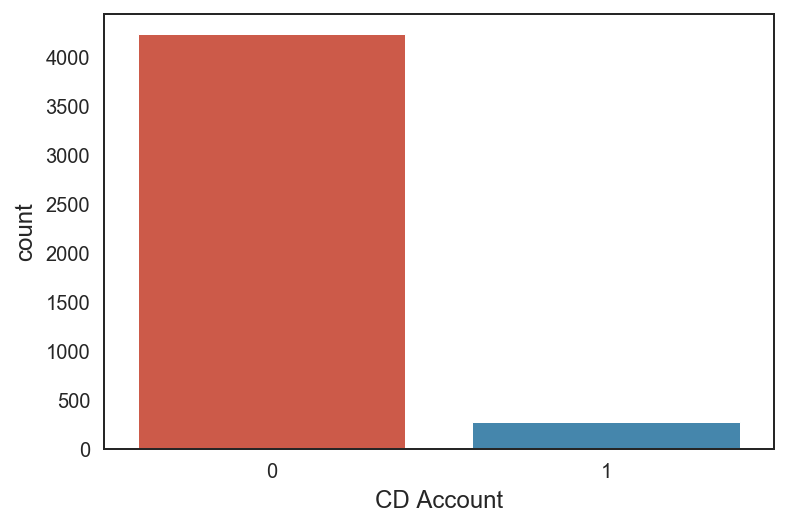

In [22]:
sns.countplot(x='CD Account', data=data_raw);

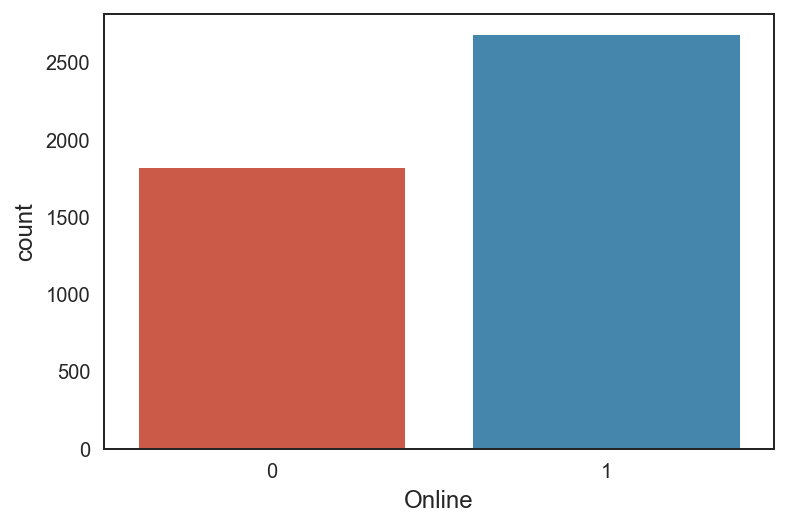

In [23]:
sns.countplot(x='Online', data=data_raw);

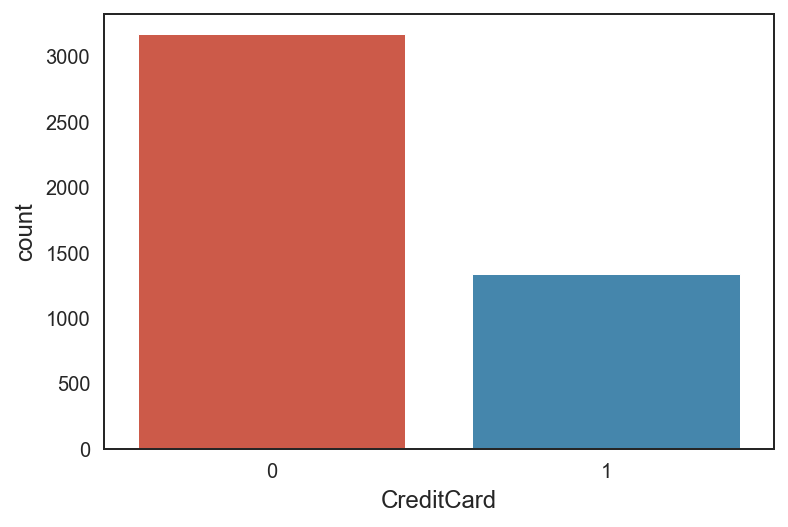

In [24]:
sns.countplot(x='CreditCard', data=data_raw);

### Section Info

This section of visualization is created to prove the results that were concluded in Section 3.2.3

## 4.3 Catplot

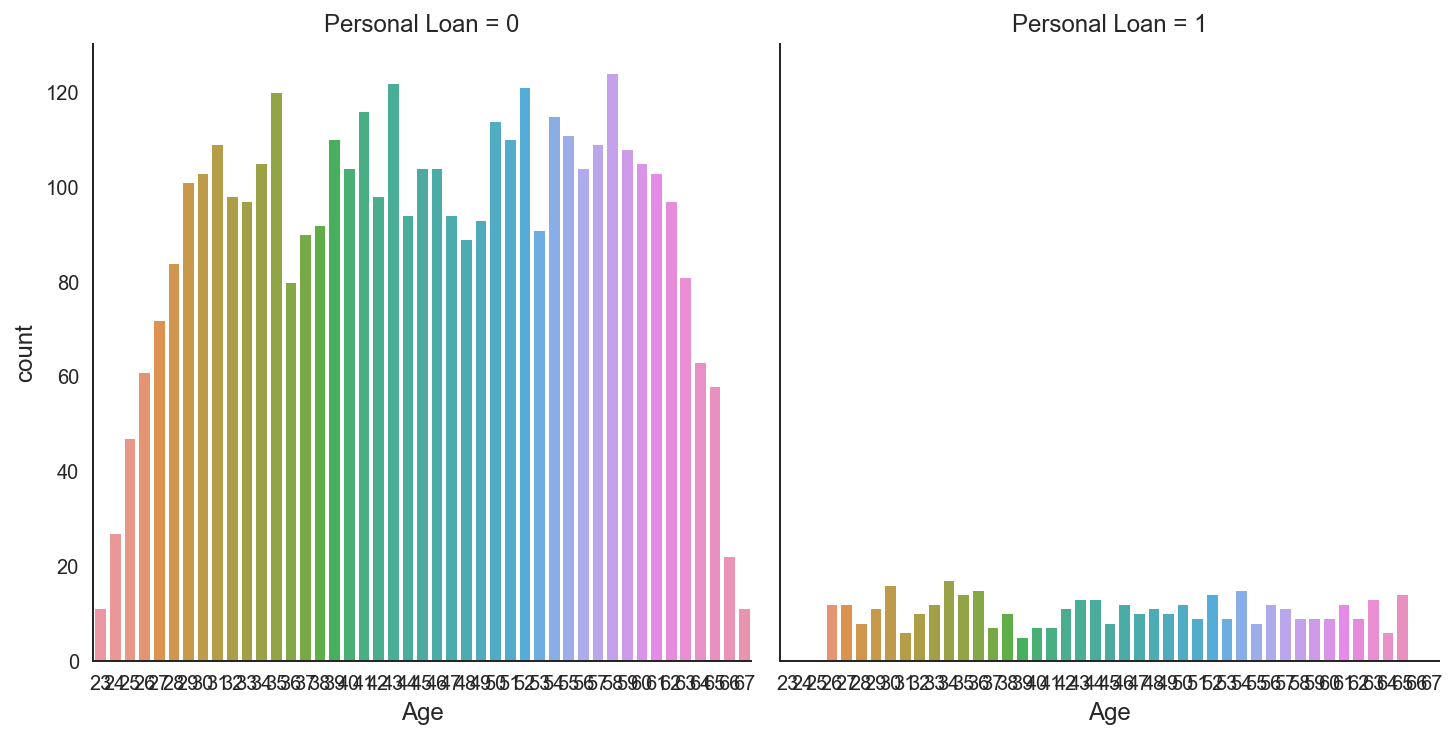

In [25]:
sns.catplot(x='Age', col='Personal Loan', kind='count', data=data_raw);

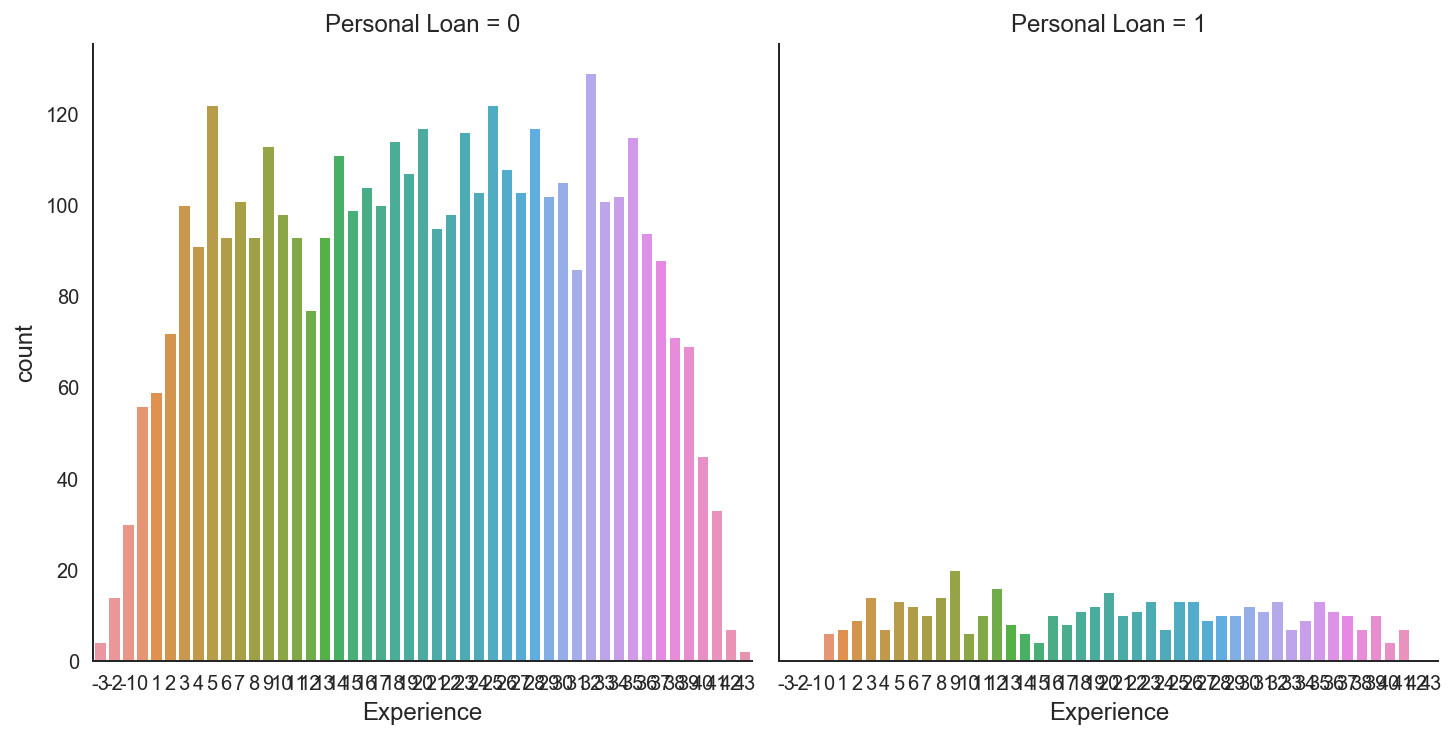

In [26]:
sns.catplot(x='Experience', col='Personal Loan', kind='count', data=data_raw);

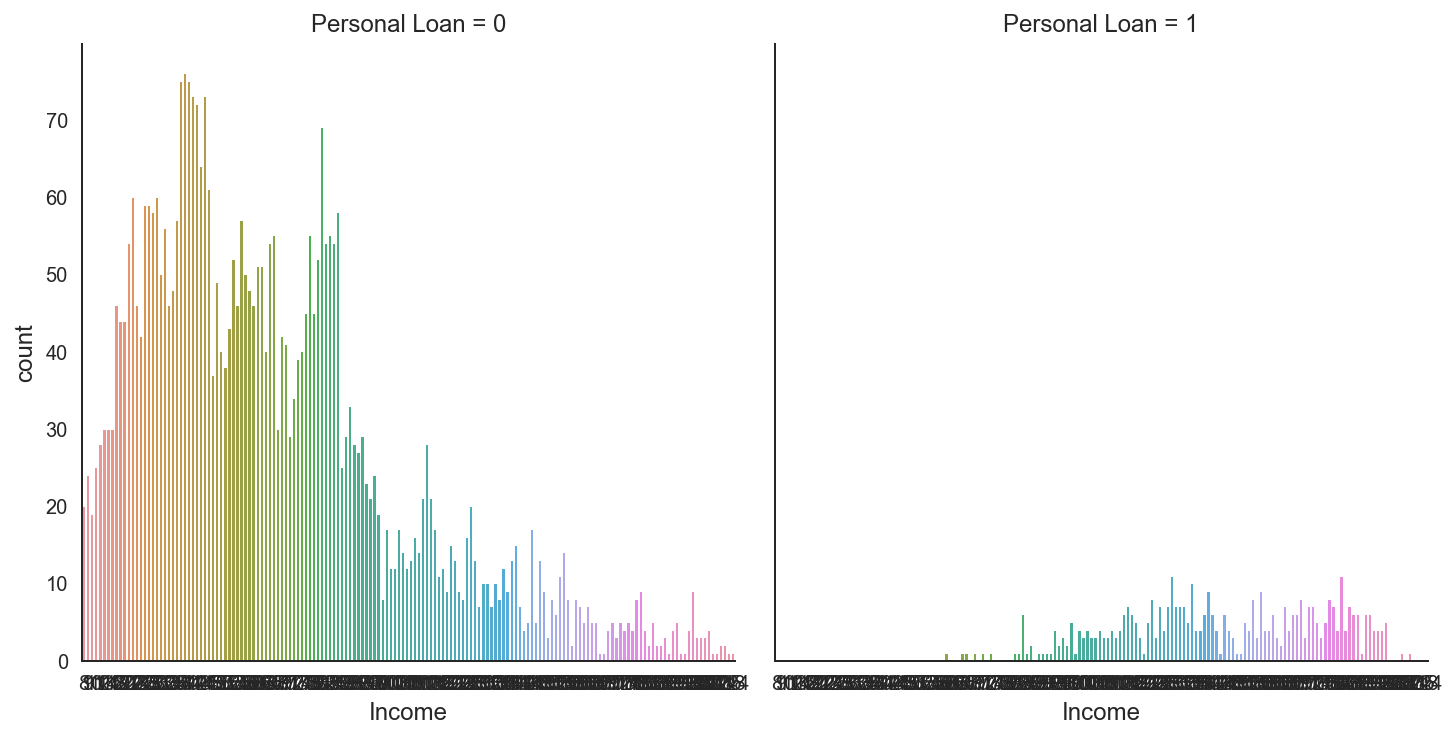

In [27]:
sns.catplot(x='Income', col='Personal Loan', kind='count', data=data_raw);

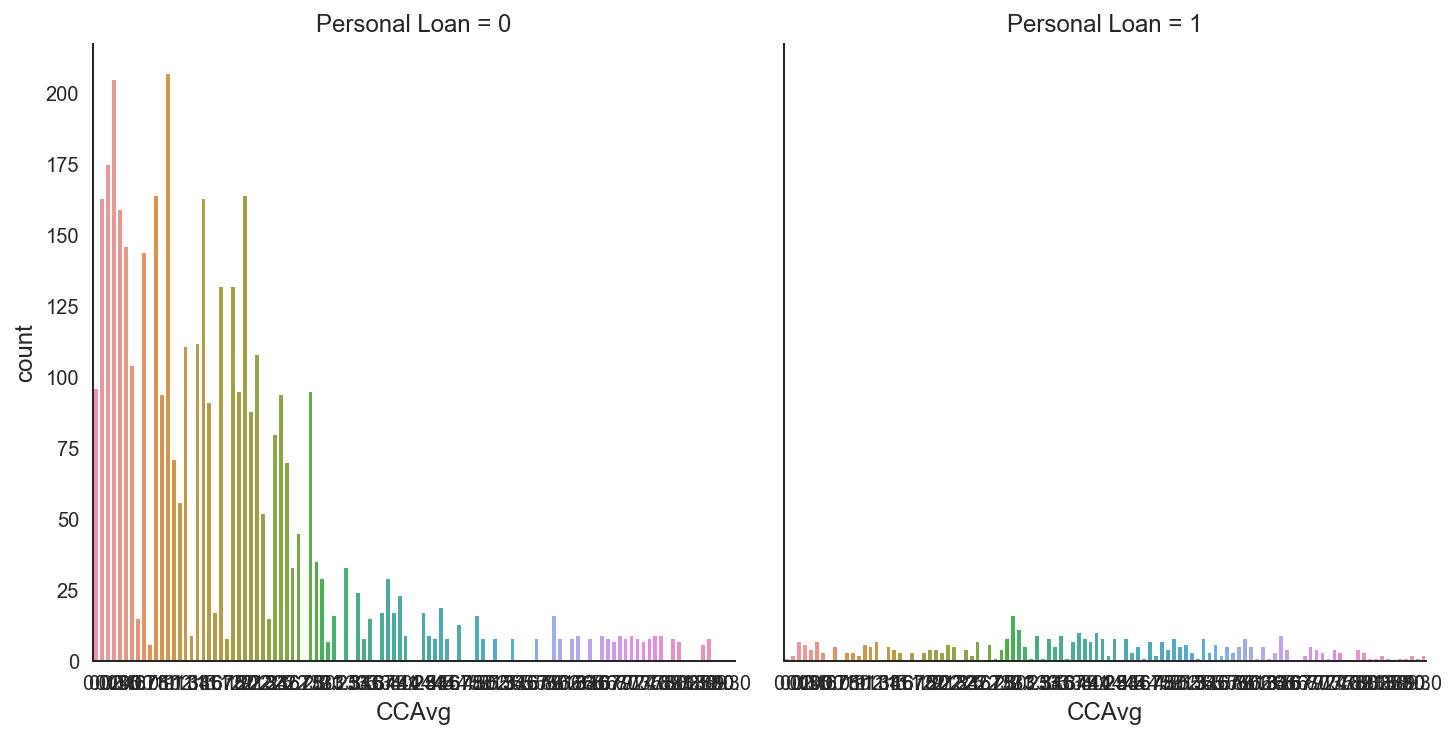

In [28]:
sns.catplot(x='CCAvg', col='Personal Loan', kind='count', data=data_raw);

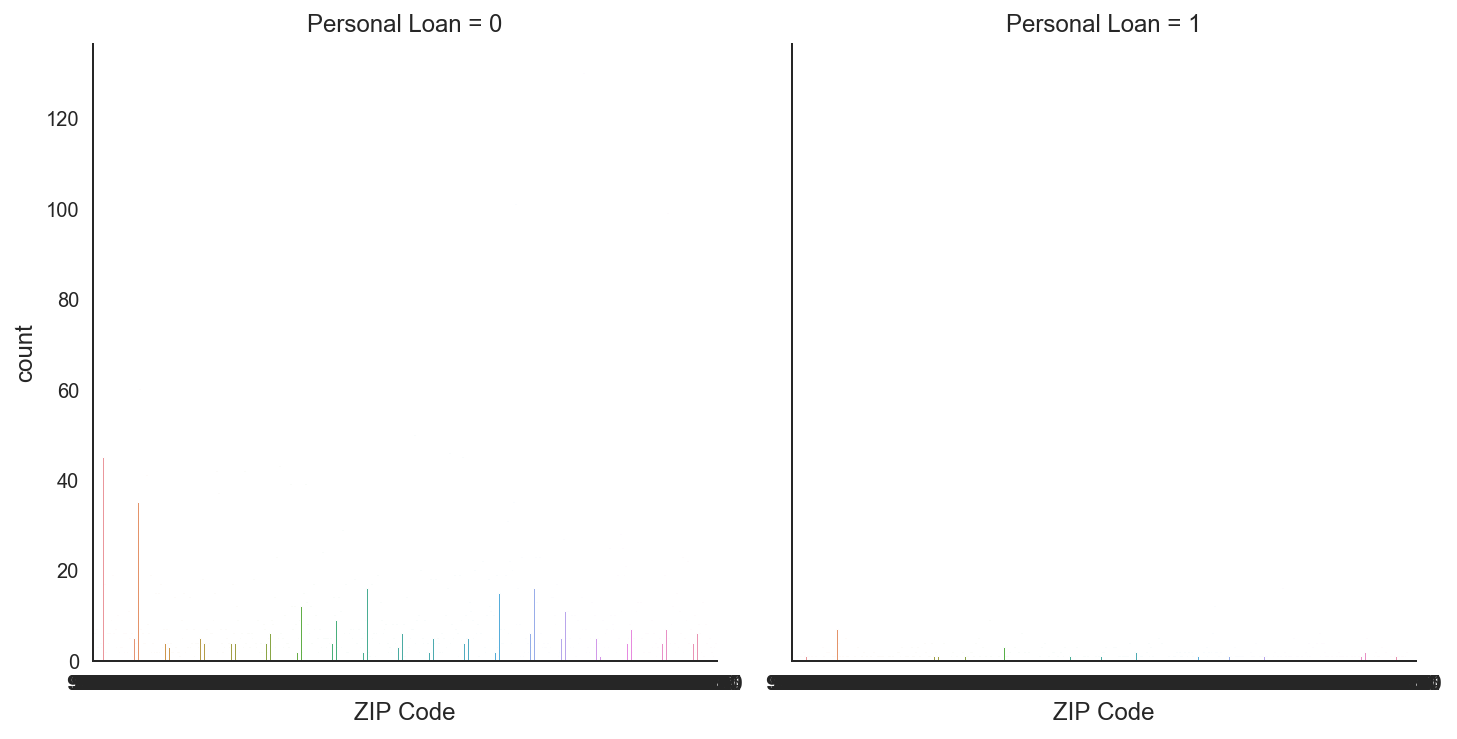

In [29]:
sns.catplot(x='ZIP Code', col='Personal Loan', kind='count', data=data_raw);

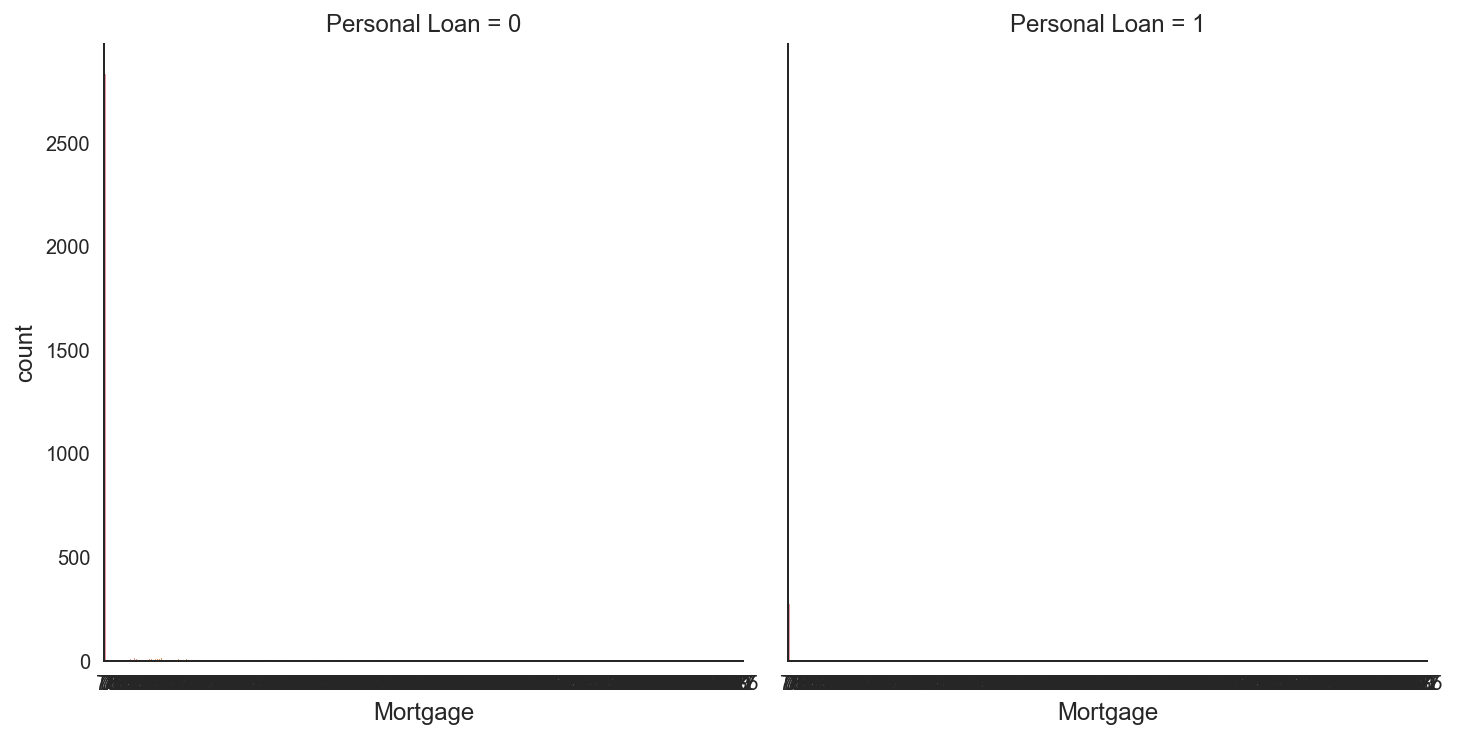

In [30]:
sns.catplot(x='Mortgage', col='Personal Loan', kind='count', data=data_raw);

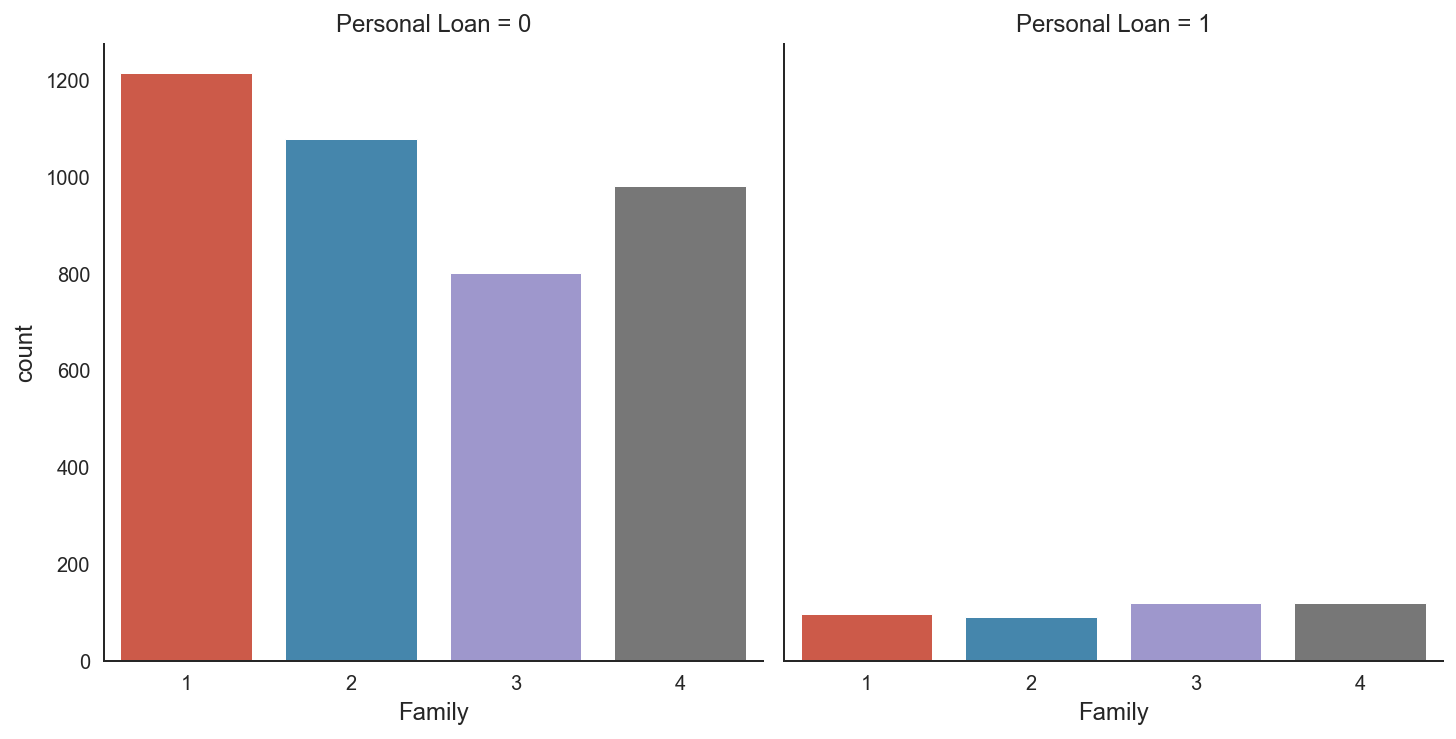

In [31]:
sns.catplot(x='Family', col='Personal Loan', kind='count', data=data_raw);

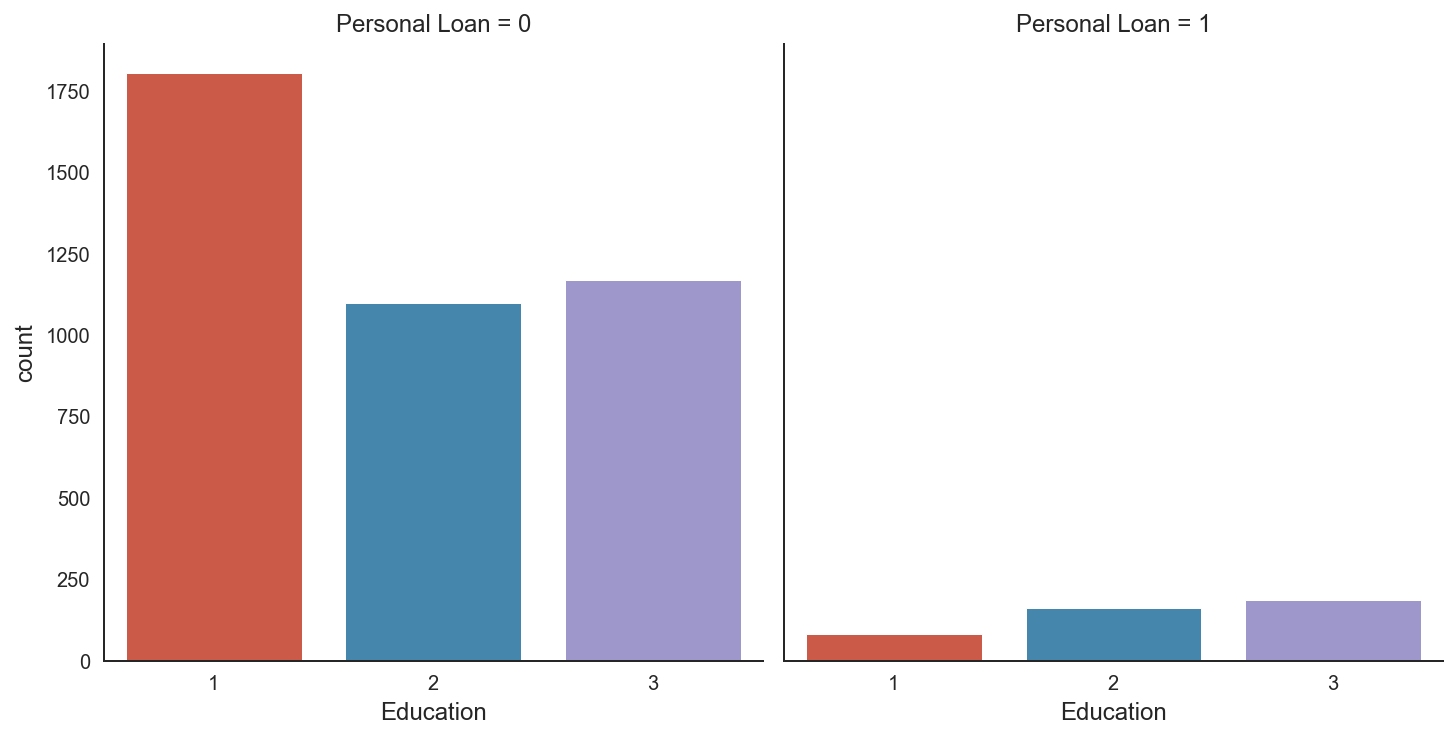

In [32]:
sns.catplot(x='Education', col='Personal Loan', kind='count', data=data_raw);

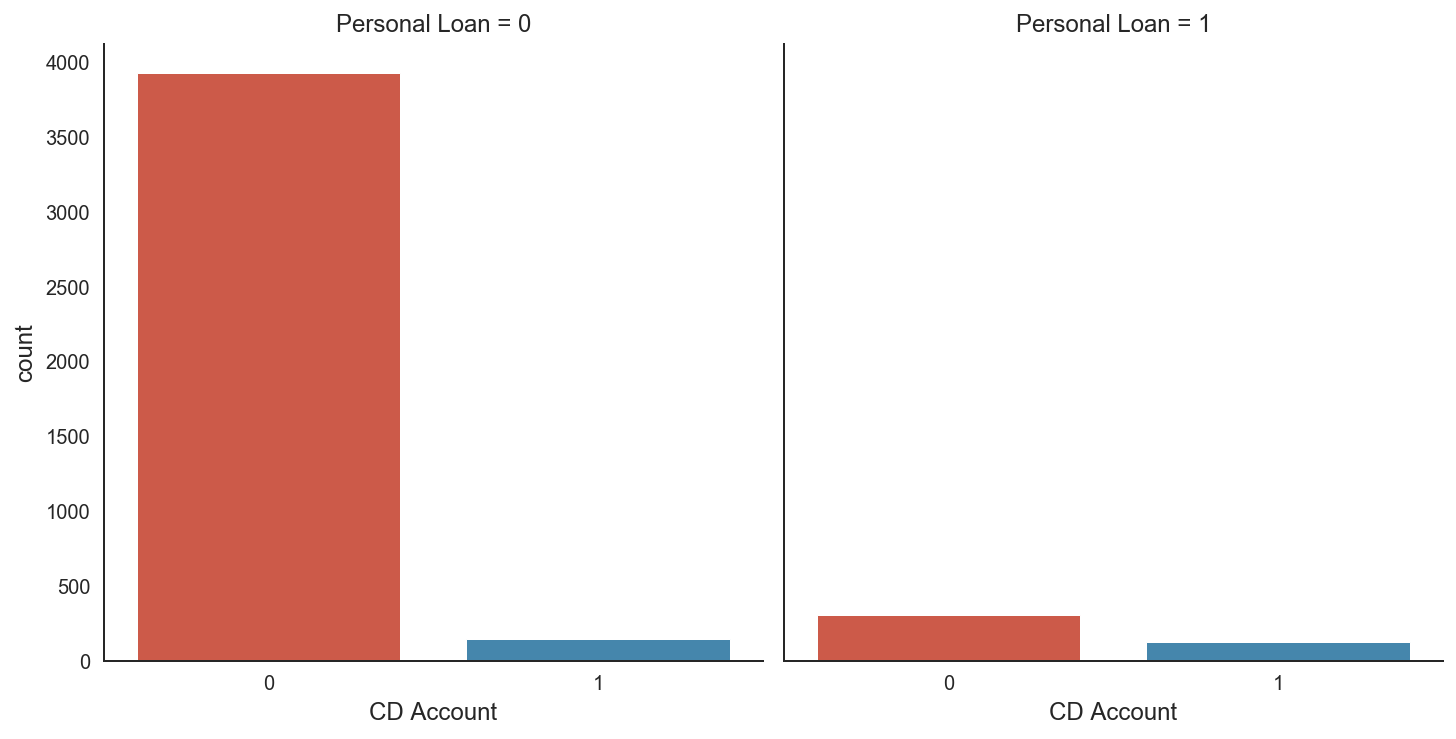

In [33]:
sns.catplot(x='CD Account', col='Personal Loan', kind='count', data=data_raw);

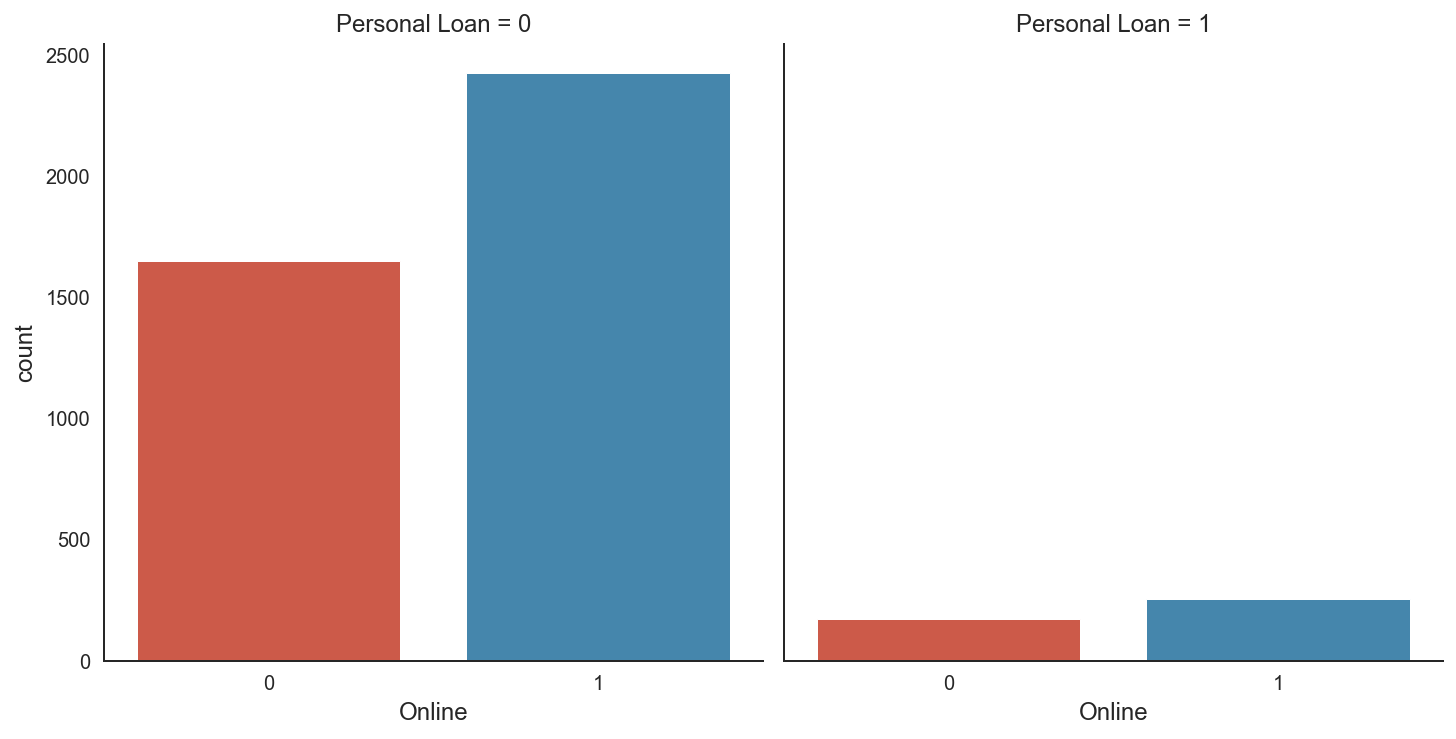

In [34]:
sns.catplot(x='Online', col='Personal Loan', kind='count', data=data_raw);

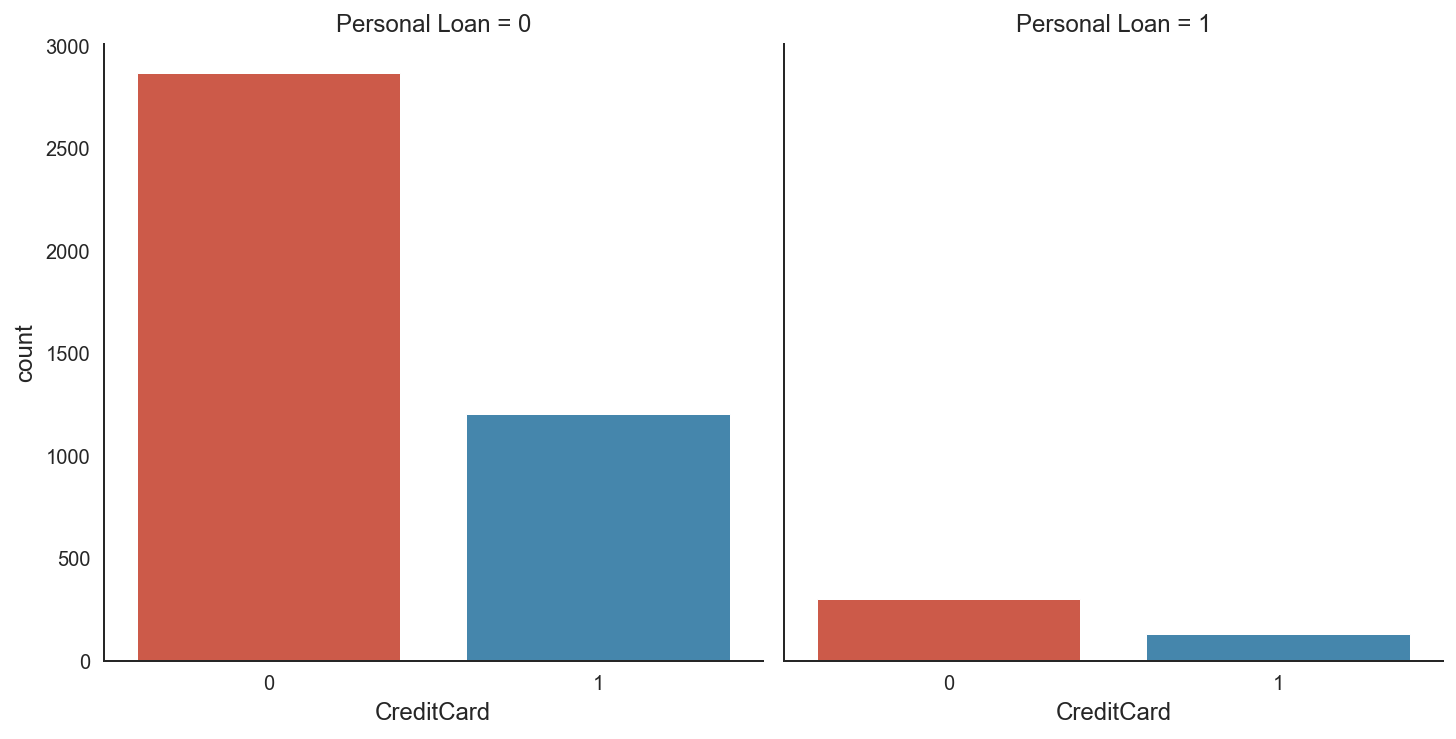

In [35]:
sns.catplot(x='CreditCard', col='Personal Loan', kind='count', data=data_raw);

### Section Info

Plot catplot for all features to check out the distribution of features for both people who have taken Personal Loans and who have not.

- In all of plots distribution of those who have taken Personal Loans is much less than those who have not and that's a proof for distribution check in Section 3.2.3
- Age distribution for Personal Loan = 1 is distributed some how equally. however for personal loan = 0 despite the equal distribution in the middle, both sides have gradually less distribution than the middle.
- Same distribution as Age happens to be true for Experience. This might mean there is a correlation between Age and Experience.
- Income feature for Personal Loan = 0 has a positive skew distribution. As it seems not so many people with low income happen to take Personal Loans. As it has beeen checked before number of people who have higher income, decreases as the income rises up. so this positive skew is correct and sound. For Personal Loan = 1 there is a rising distribution as the Income rises up. But again after approximately 190k Income the number of Personal Loan takers decreases significantly. Though the number of people with incomes higher than 190k decreases sharply, it seems that these people are rich enough to have no needs for personal Loans.
- Zip code plot serves no information as the plot is not clear enough.
- Same thing as zip code plot is true for Mortgage
- Family catplot with Personal Loan = 0 shows that most of customers have family size around 1 or 2. That means they are alone or married without kids or single with a kid. Number of customers with family size of 3 is less than others. By looking at the Personal Loan = 1 catplot on the other hand, it seems that the need for Personal Loan increases with family size. It seems logical as most of customers with higher family size need to provide more money for family needs.
- As presented before, number of people with level 1 education is more than other levels. This proves the Personal Loan = 0 plot as it represents bigger part of data. However in Personal Loan = 1 it is crystal clear that people with higher levels of education tend to take more loans. There are many reasons for this but one might be that people with better educations have better plans for taking loans and paying them back to the bank.
- Despite the difference in distribution for CD Account = 0, customers have same distribution for CD Account = 1 in both Personal Loan = 0 and Personal Loan = 1.
- Number of customers who use online services are high in both Personal Loan = 0 and Personal Loan = 1. But again number of customers who take Personal Loans is alot less than those don't.
- Like Online, CreditCard has no effect in loan taking because Personal Loan = 1 follows the distribution of Personal Loan = 0 and has much less distribution than Personal Loan = 0

## 4.4 Scatter Matrix Plot

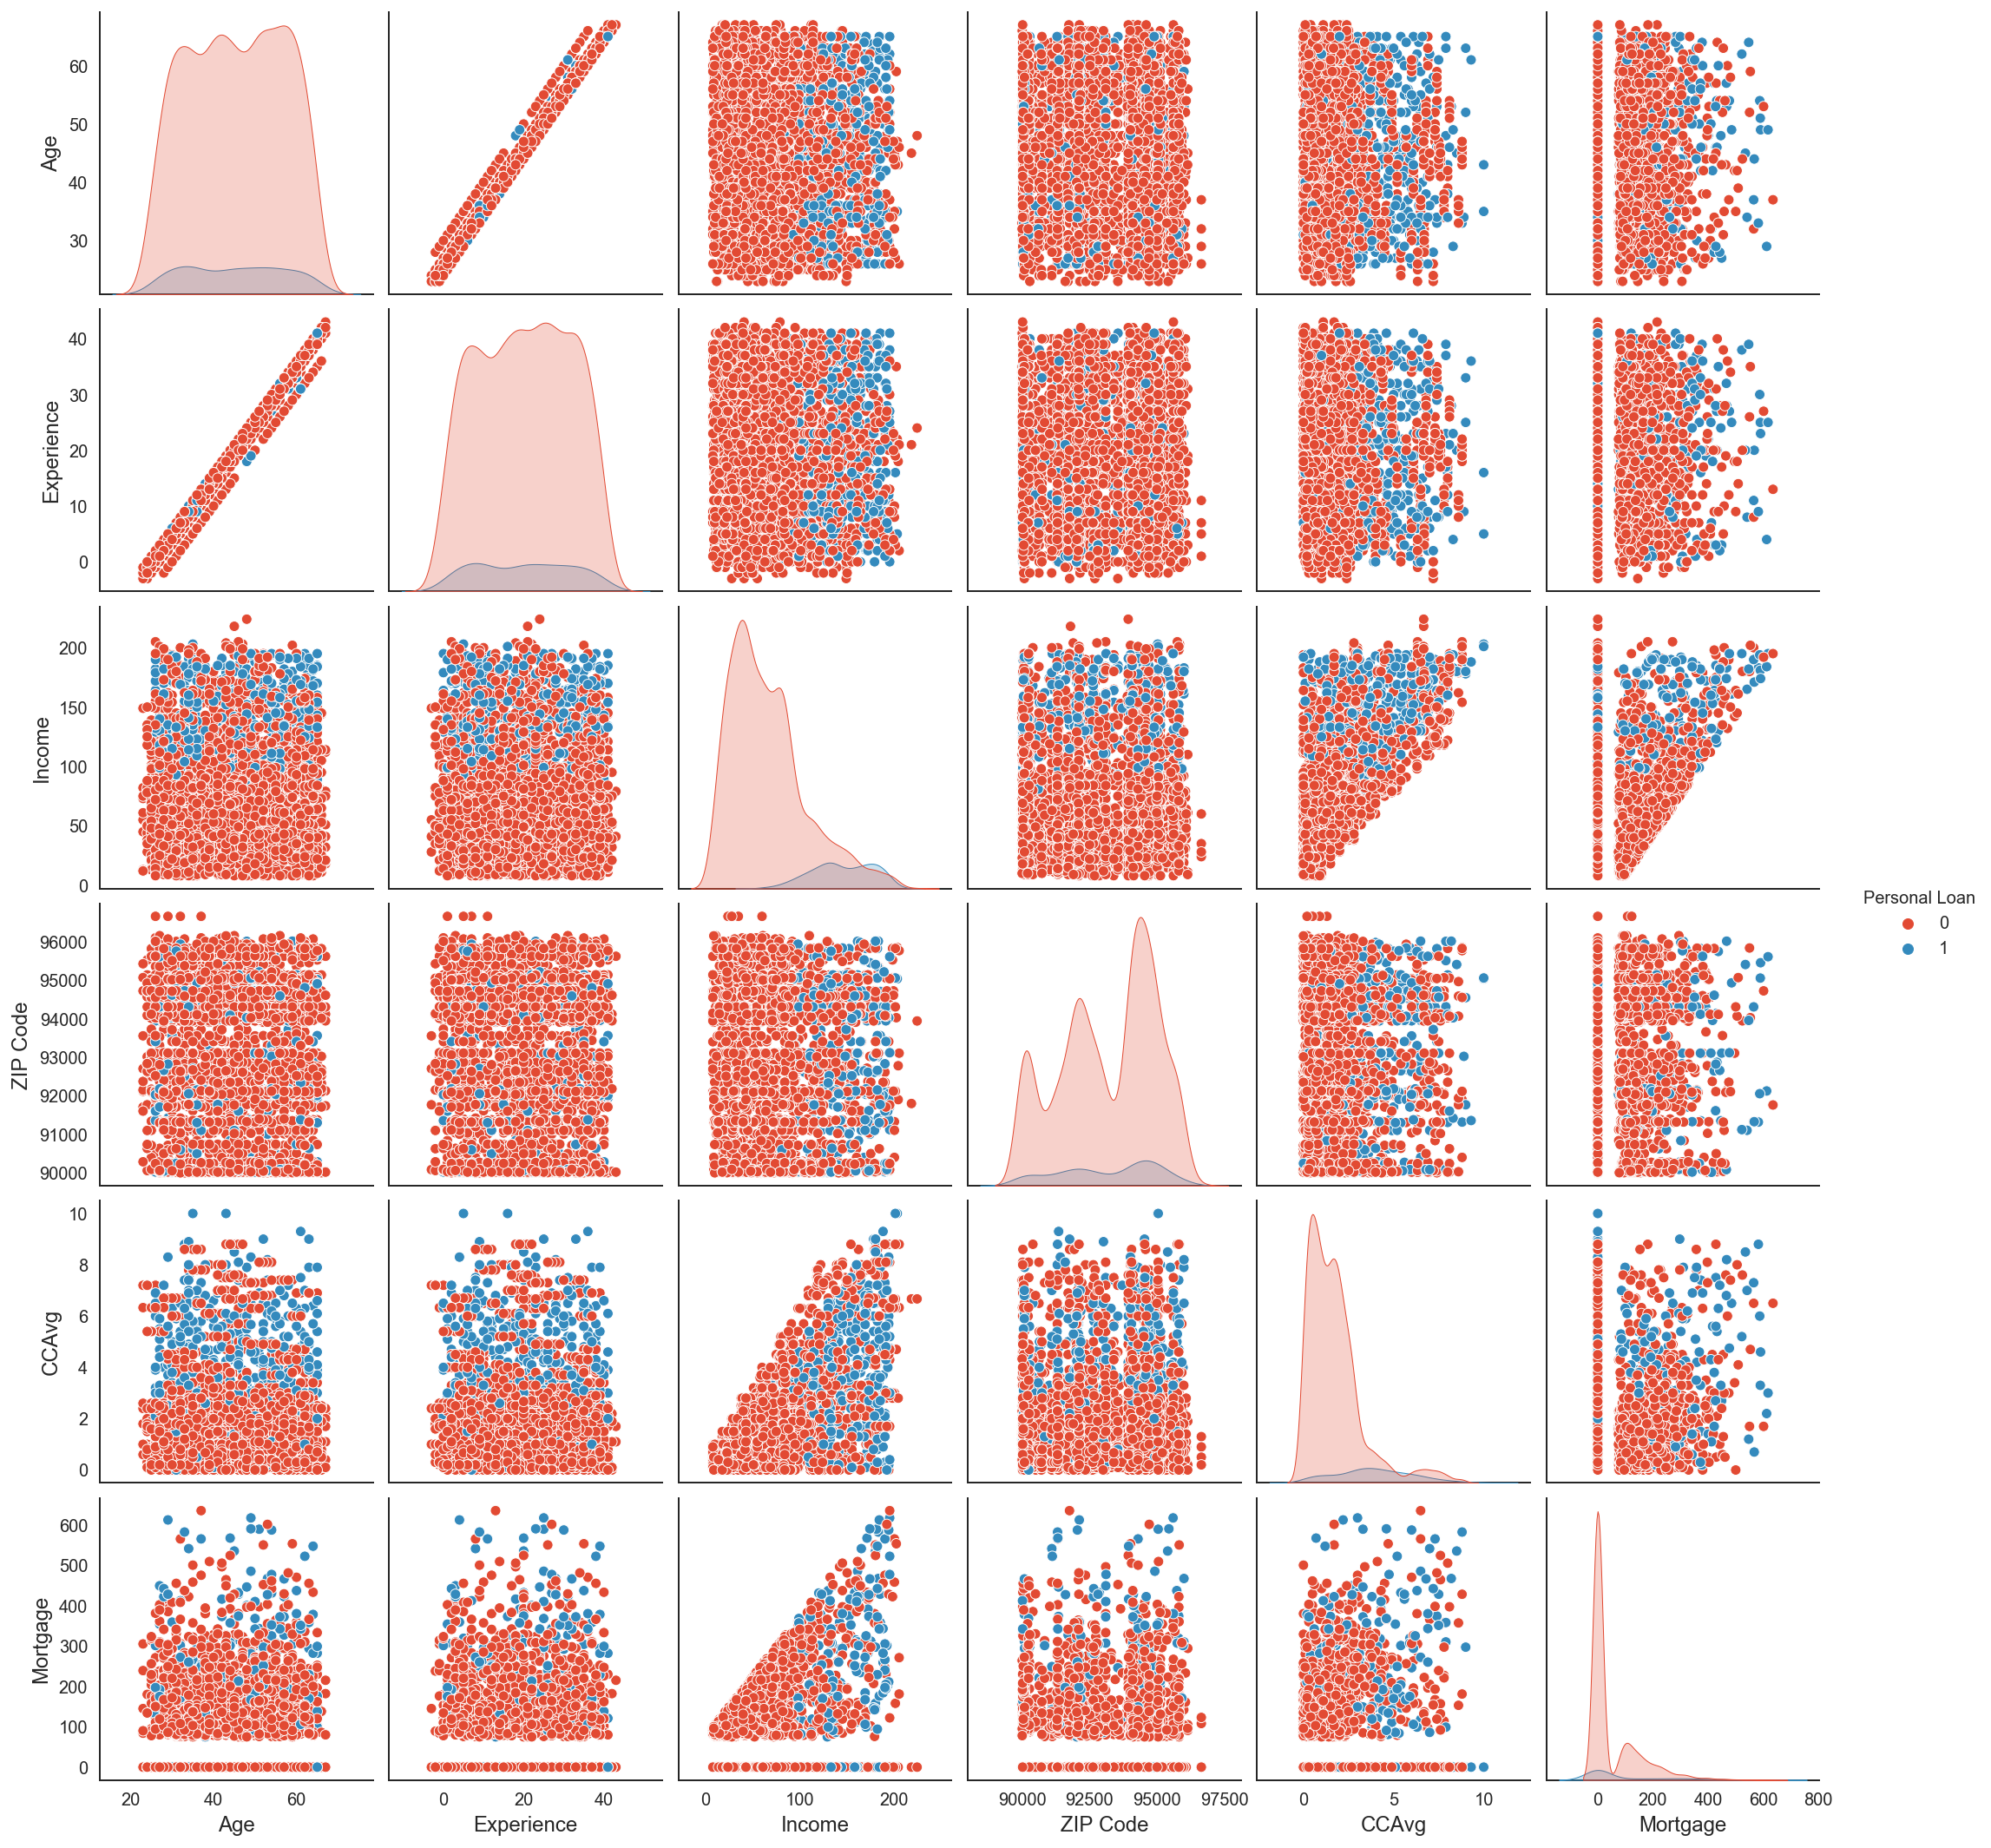

In [36]:
data1 = data_raw[['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage', 'Personal Loan']]
sns.pairplot(data=data1, hue='Personal Loan');

### Section Info

This section is created as it may provide info for further results and confirm them.

# Step 5: Cleaning, Correcting, Completing, Creating

## 5.1 Cleaning

In [37]:
dataset = data_raw.drop(columns=['ID', 'ZIP Code', 'Mortgage'])
dataset

Age  Experience  Income  Family  CCAvg  Education  Personal Loan  \
0      44          20     160       2   7.60          1              0   
1      52          27      78       4   3.60          3              0   
2      29           3     148       3   4.10          1              1   
3      61          36      30       3   1.30          2              0   
4      28           3      81       4   0.20          1              0   
...   ...         ...     ...     ...    ...        ...            ...   
4495   62          37      24       1   0.30          3              0   
4496   51          27      43       4   1.10          2              0   
4497   57          33      61       3   2.67          1              0   
4498   27           1      43       1   1.50          1              0   
4499   41          15      75       1   1.50          3              0   

      Securities Account  CD Account  Online  CreditCard  
0                      1           0       0           0  
1                      0           0       1           0  
2                      0           0       1           0  
3                      0           0       0           0  
4                      0           0       0           0  
...                  ...         ...     ...         ...  
4495                   1           0       1           0  
4496                   0           0       1           1  
4497                   0           0       1           0  
4498                   0           0       1           0  
4499                   0           0       1           0  

[4500 rows x 11 columns]

### Section Info

As mentioned in 3.2.2 the ID column has no use in this solution. Also ZIP Code and Mortgage seemed to have no clear effect after checking correlation in Section 7.1. So they had been removed in this section.

## 5.2 Correcting

In [38]:
dataset = dataset[dataset['Experience'] >= 0]
dataset

Age  Experience  Income  Family  CCAvg  Education  Personal Loan  \
0      44          20     160       2   7.60          1              0   
1      52          27      78       4   3.60          3              0   
2      29           3     148       3   4.10          1              1   
3      61          36      30       3   1.30          2              0   
4      28           3      81       4   0.20          1              0   
...   ...         ...     ...     ...    ...        ...            ...   
4495   62          37      24       1   0.30          3              0   
4496   51          27      43       4   1.10          2              0   
4497   57          33      61       3   2.67          1              0   
4498   27           1      43       1   1.50          1              0   
4499   41          15      75       1   1.50          3              0   

      Securities Account  CD Account  Online  CreditCard  
0                      1           0       0           0  
1                      0           0       1           0  
2                      0           0       1           0  
3                      0           0       0           0  
4                      0           0       0           0  
...                  ...         ...     ...         ...  
4495                   1           0       1           0  
4496                   0           0       1           1  
4497                   0           0       1           0  
4498                   0           0       1           0  
4499                   0           0       1           0  

[4452 rows x 11 columns]

### Section Info

According to 3.2.2 there are 48 rows invalid Experience values. The Personal Loan value for all of these rows is equal to 0 which means they have almost no impact in classification. This section is provided to eliminate these invalid values.

## 5.3 Completing

### Section Info
All data rows and columns are complete so this step is not neccessary.

## 5.4 Creating

### Section Info

No beneficial features can  be created from current features in dataset

# Step 6: Scale Data 

In [39]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_dataset = pd.DataFrame(scaled_data, columns=dataset.columns) 

### Section Info

Scaling dataset between 0 and 1 (MinMax Scale) to decrease the bound size of features which results in less computational error, better learning and more accuracy.

# Step 7: EDA with Statistics

## 7.1 Correlation heatmap

In [40]:

def correlation_heatmap(df, type):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(method=type),
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)



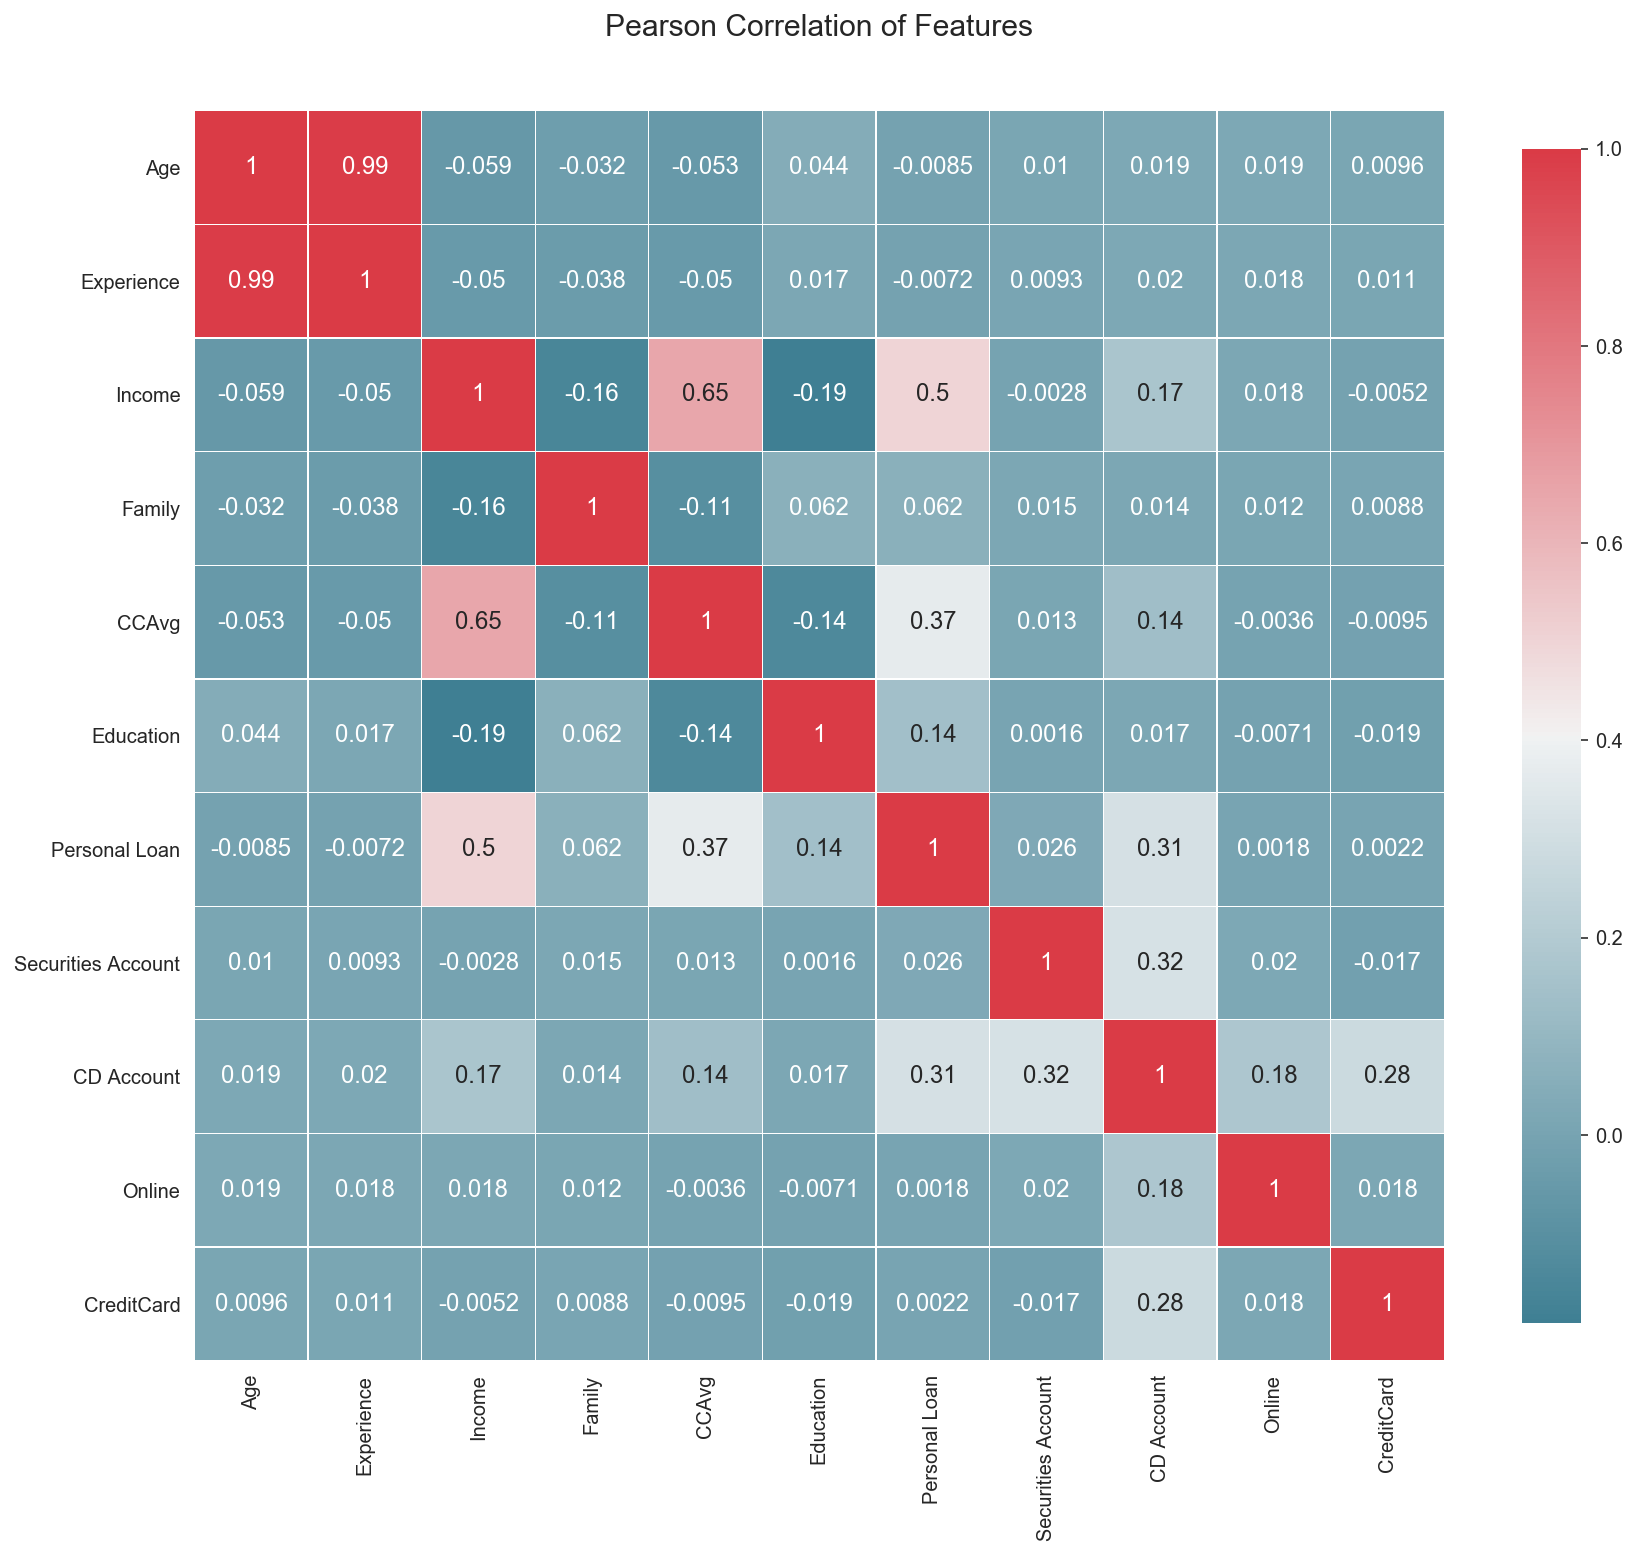

In [41]:
correlation_heatmap(scaled_dataset, 'pearson')

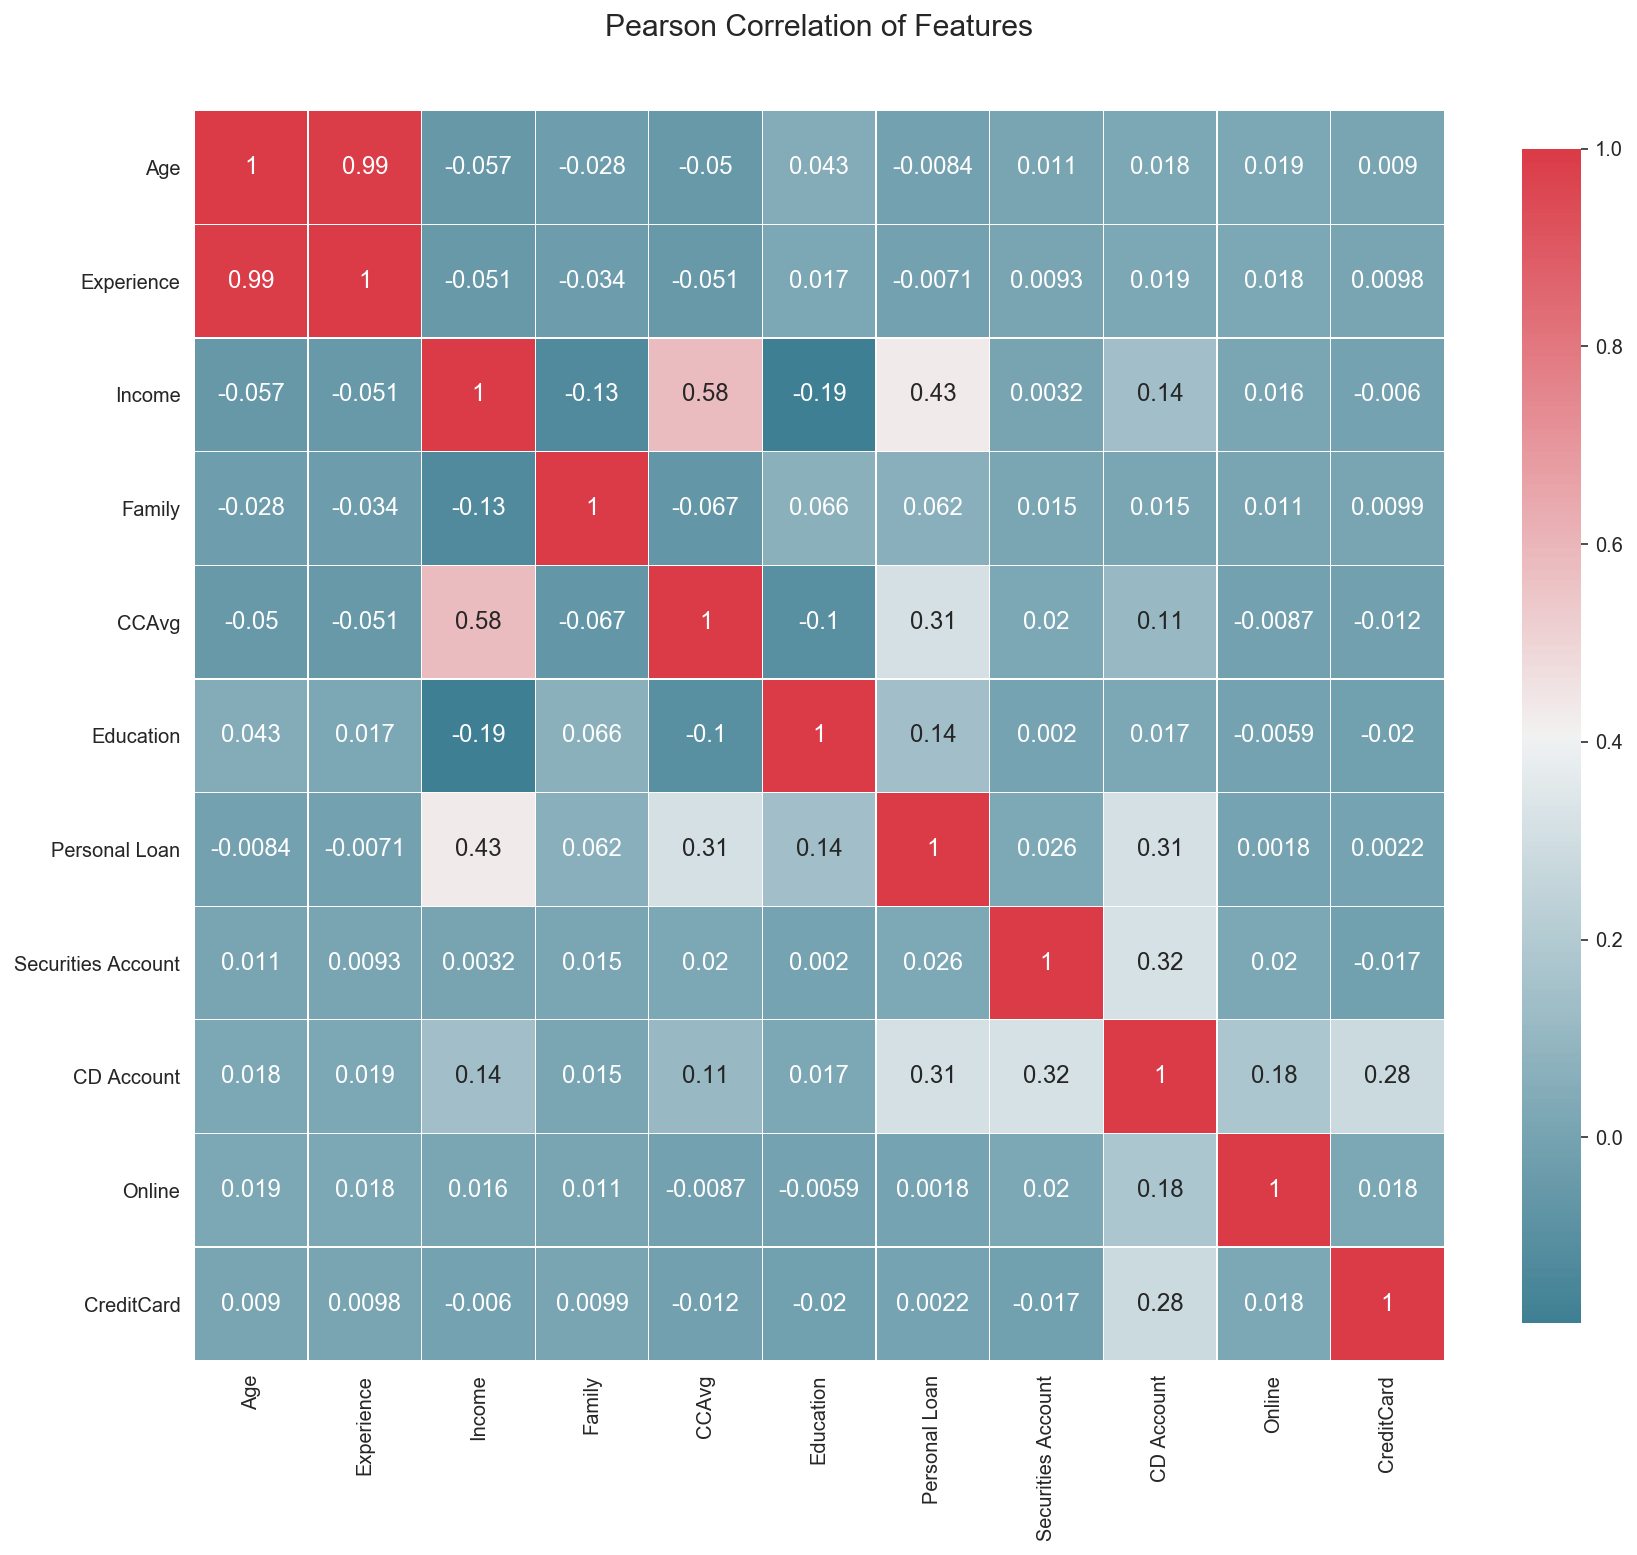

In [42]:
correlation_heatmap(scaled_dataset, 'spearman')

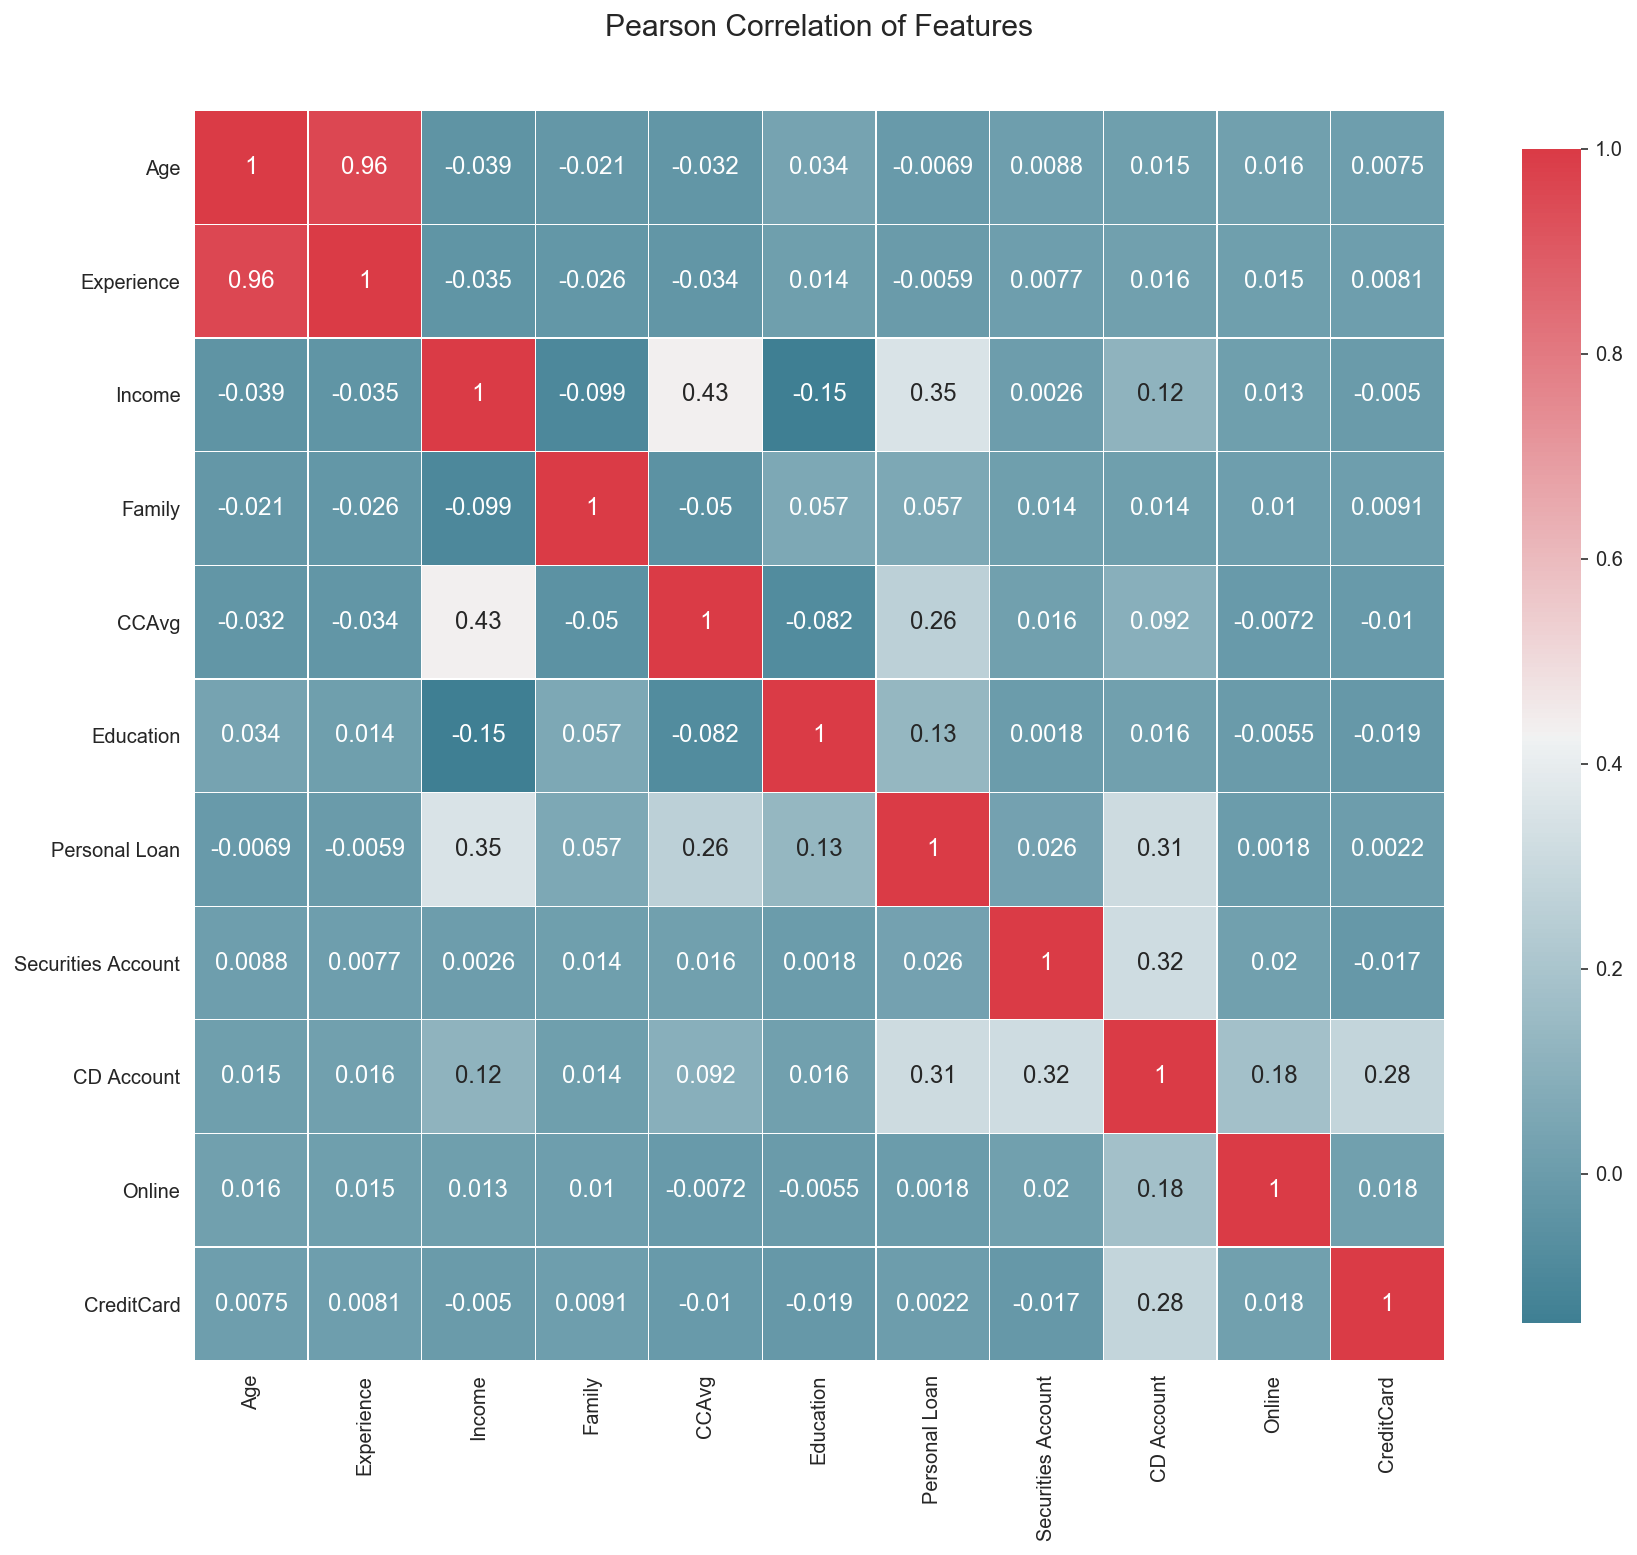

In [43]:
correlation_heatmap(scaled_dataset, 'kendall')

### Section Info

- Correlations between features and target feature has shown that Mortgage and ZIP Code featues had no important effect on target. Yet they decreased the performance speed and increased learning time. So they removed from dataset in section 5.1.
- As seen on all heatmaps, there is a huge positive correlation between Age and Experience. The second most correlative features are Income and CCAvg. If we check the description for these features this correlation in correct and sound.
- The most desired correlations in these heatmaps are those with Target feature (Personal Loan). By checking Personal Loan column, the most correlative feature with target is Income. Then there is CCAvg and surprisingly, CD Account. Also Education keeps a bit of correlation  with target feature. All of these correlations were predicted in section 4.3 except for CD Account.

## 7.2 Boxplot

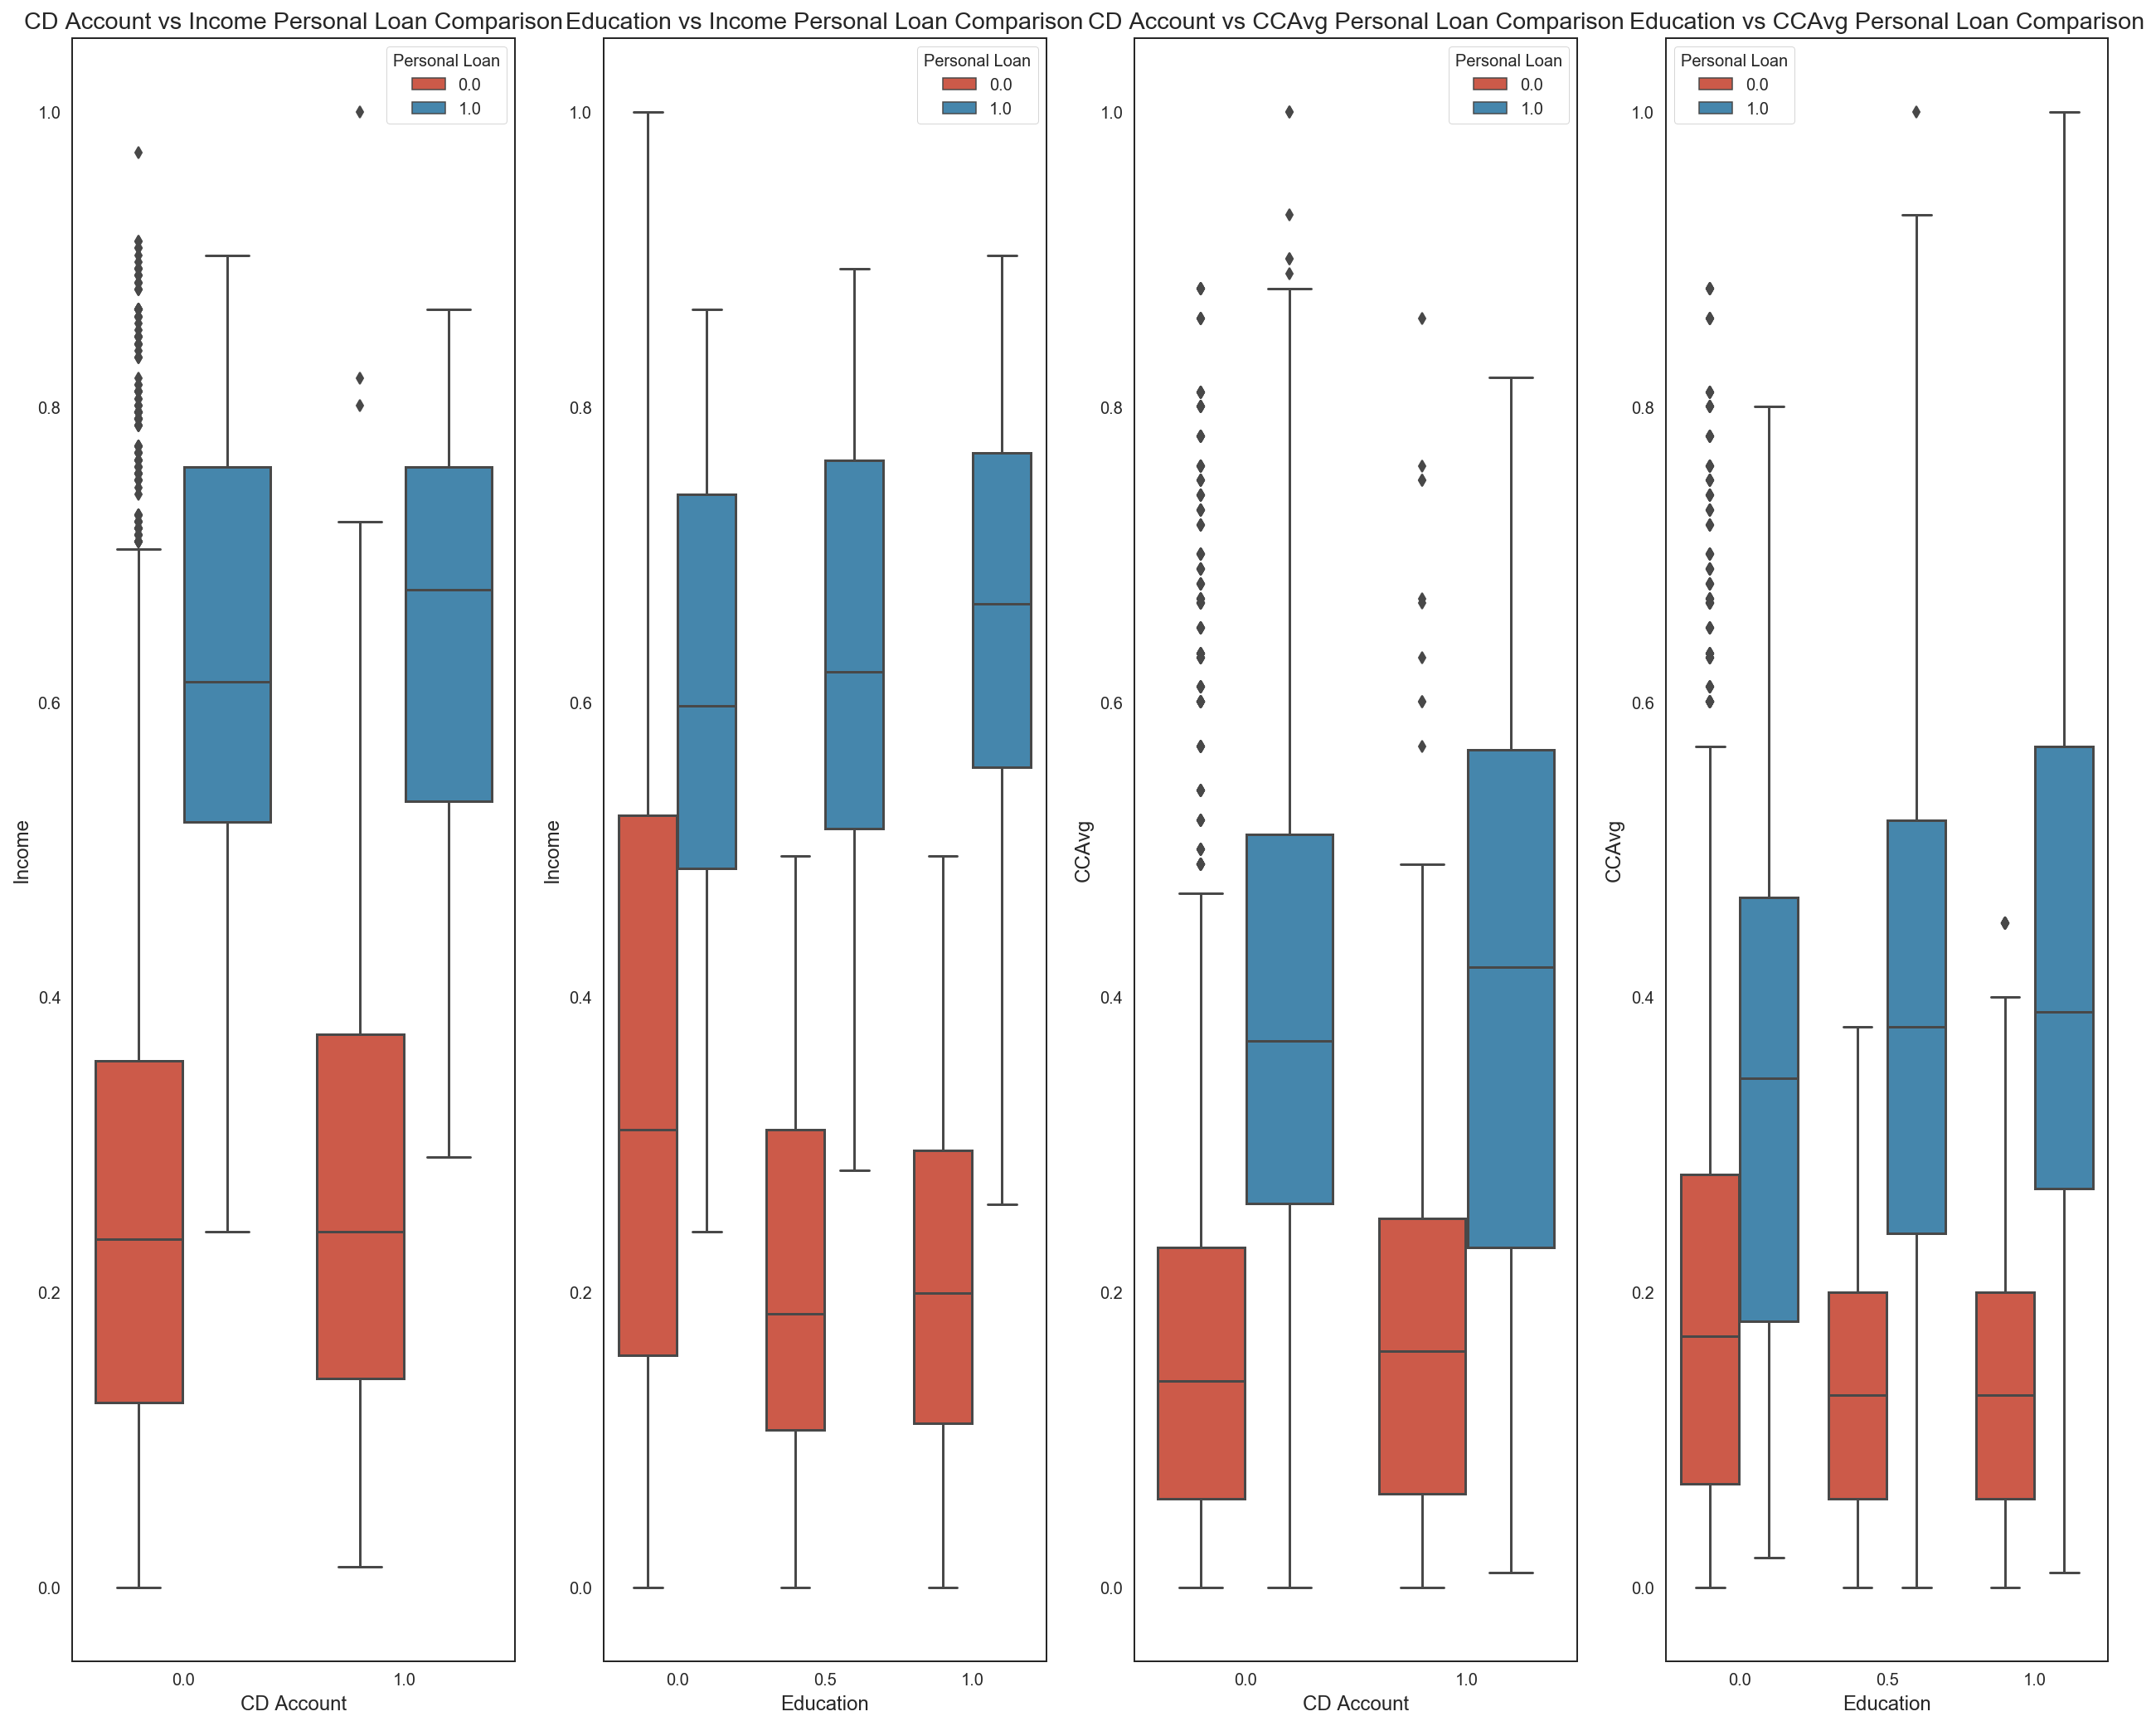

In [44]:
fig, (axis1,axis2,axis3,axis4) = plt.subplots(ncols=4,nrows=1,figsize=(22,18))

sns.boxplot(x = 'CD Account', y = 'Income', hue = 'Personal Loan', data = scaled_dataset, ax = axis1);
axis1.set_title('CD Account vs Income Personal Loan Comparison');

sns.boxplot(x = 'Education', y ='Income', hue = 'Personal Loan', data = scaled_dataset, ax = axis2);
axis2.set_title('Education vs Income Personal Loan Comparison');

sns.boxplot(x = 'CD Account', y ='CCAvg', hue = 'Personal Loan', data = scaled_dataset, ax = axis3);
axis3.set_title('CD Account vs CCAvg Personal Loan Comparison');

sns.boxplot(x = 'Education', y ='CCAvg', hue = 'Personal Loan', data = scaled_dataset, ax = axis4);
axis4.set_title('Education vs CCAvg Personal Loan Comparison');

### Section Info

From Section 7.1 4 features tend to be more correlative with Target feature. two of these features (Education and CD Account) were qualitative features and two of them (Income and CCAvg) were quantitative features. This can be used to plot 4 Boxplots to check the IQR, Min, Max, and mean values for Income and CCAvg for different values of CD Account and Education. We use these box plots to find out the range that involves customers with Personal Loan equal to 1.

- Income vs CD Account shows that wether The CD Account is 0 or 1 the higher income increases the chance of Personal Loan be equal to 1. However the range is denser and smaller in CD Account = 1. Also customers who do not use CD Account have lesser Incomes.
- In Income vs Education it again represents that higher Income has more impact on Personal Loan = 1. Also More Education provides higher Income but the range decreases for higher levels of education.
- CCAvg vs CD Account shows no correlation between CCAvg and CD Account value(provable by correlation heatmaps). But Higher CCAvg results in more Personal Loan customers. Also customers with CD Account = 1 tend to take more range of CCAvg.
- In CCAvg vs Education as Education level increases, the range for Personal Loan increases and goes higher. For level 1 Education range of customers with Personal Loan = 0 is bigger and higher than other levels.

# Step 8: Model Data

## 8.1 Define Models

In [45]:
#Machine Learning Algorithm (MLA) Selection and Initialization

MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(), 
    ensemble.RandomForestClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),    
 
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(), 
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.LinearSVC(),
    
    #Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(), 
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    #XGBoost
    XGBClassifier()
    ]


### Section Info

This section initializes different types of models (without hyper parameter configuarion) for learning and classification of given data.

## 8.2 Seperate And Prepare Target Feature 

In [46]:
X = scaled_dataset.drop(columns='Personal Loan',inplace=False)
y = pd.DataFrame(scaled_dataset['Personal Loan'], columns=['Personal Loan'])

In [47]:
print("X Shape: ", X.shape)
print("y Shape: ", y.shape)

X Shape:  (4452, 10)
y Shape:  (4452, 1)


In [48]:
y = y.values.ravel()

### Section Info

Here the dataset is divided into X (Learning Features) and y (Trget Feature). Then for model accessiblity the shape of y is changed by ravel() method.

## 8.3 Split Dataset, Train Models, Predict Values

In [49]:

#split dataset in cross-validation with this splitter class
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) 

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = {}

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    print(MLA_name)
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name;
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params());
    
    #score model with cross validation: 
    cv_results = model_selection.cross_validate(alg, X, y, cv  = cv_split, return_train_score=True);

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean();
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean();
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   ;
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3 ;
    
    #save MLA predictions
    alg.fit(X, y);
    MLA_predict[MLA_name] = alg.predict(X);
    
    row_index+=1





AdaBoostClassifier
BaggingClassifier
RandomForestClassifier
ExtraTreesClassifier
GradientBoostingClassifier
GaussianProcessClassifier
LogisticRegressionCV
PassiveAggressiveClassifier
RidgeClassifierCV
SGDClassifier
Perceptron
BernoulliNB
GaussianNB
KNeighborsClassifier
SVC
LinearSVC
DecisionTreeClassifier
ExtraTreeClassifier
LinearDiscriminantAnalysis
QuadraticDiscriminantAnalysis
XGBClassifier


c:\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:01:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:01:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[18:01:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:01:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:01:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:01:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### Section Info

- First, dataset is splitting gets initialized using cross-validation by 10 splits, dividing data into 30% test size and 60% train size.
- Second, a dataframe created to keep record of the performances of Models.
- Third, A table is created for comparing performance of models.
- Fourth, for each algorithm provided in section 8.1, the name and paramteres of algorithm is acquired and submitted as the name and paramters of the model in dataframe. Then model is trained using the splitted dataset in first step. The results get submitted in cv_results. Each performance metric is acquired from cv_results and submitted in dataframe regarding to their labels. Finally a prediction on whole dataset takes place and results are saved on the table that was initialized in third step.


# Step 9: Compare Performance of Models

## 9.1 Score Compare

In [50]:
#print and sort table: 
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

MLA Name  \
20                  XGBClassifier   
4      GradientBoostingClassifier   
2          RandomForestClassifier   
1               BaggingClassifier   
3            ExtraTreesClassifier   
16         DecisionTreeClassifier   
14                            SVC   
0              AdaBoostClassifier   
17            ExtraTreeClassifier   
5       GaussianProcessClassifier   
13           KNeighborsClassifier   
15                      LinearSVC   
6            LogisticRegressionCV   
9                   SGDClassifier   
18     LinearDiscriminantAnalysis   
7     PassiveAggressiveClassifier   
8               RidgeClassifierCV   
19  QuadraticDiscriminantAnalysis   
10                     Perceptron   
11                    BernoulliNB   
12                     GaussianNB   

                                       MLA Parameters MLA Train Accuracy Mean  \
20  {'objective': 'binary:logistic', 'use_label_en...                       1   
4   {'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...                0.996256   
2   {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...                       1   
1   {'base_estimator': None, 'bootstrap': True, 'b...                0.998615   
3   {'bootstrap': False, 'ccp_alpha': 0.0, 'class_...                       1   
16  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...                       1   
14  {'C': 1.0, 'break_ties': False, 'cache_size': ...                0.975178   
0   {'algorithm': 'SAMME.R', 'base_estimator': Non...                0.974878   
17  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...                       1   
5   {'copy_X_train': True, 'kernel': None, 'max_it...                0.960801   
13  {'algorithm': 'auto', 'leaf_size': 30, 'metric...                0.966866   
15  {'C': 1.0, 'class_weight': None, 'dual': True,...                0.952452   
6   {'Cs': 10, 'class_weight': None, 'cv': None, '...                0.953164   
9   {'alpha': 0.0001, 'average': False, 'class_wei...                0.951142   
18  {'n_components': None, 'priors': None, 'shrink...                0.944178   
7   {'C': 1.0, 'average': False, 'class_weight': N...                0.935455   
8   {'alphas': array([ 0.1,  1. , 10. ]), 'class_w...                0.936204   
19  {'priors': None, 'reg_param': 0.0, 'store_cova...                0.935605   
10  {'alpha': 0.0001, 'class_weight': None, 'early...                0.924261   
11  {'alpha': 1.0, 'binarize': 0.0, 'class_prior':...                0.911718   
12           {'priors': None, 'var_smoothing': 1e-09}                0.893411   

   MLA Test Accuracy Mean MLA Test Accuracy 3*STD    MLA Time  
20               0.985629               0.0132008    0.247116  
4                0.985329               0.0118481      0.2653  
2                0.985254              0.00989299      0.1782  
1                 0.98271               0.0124803   0.0274991  
3                 0.98271               0.0118588    0.167901  
16               0.982485               0.0107316  0.00480242  
14               0.966317               0.0112724      0.2052  
0                0.966018               0.0142444      0.1176  
17                0.95726               0.0292684  0.00310011  
5                 0.95509               0.0100923     5.98405  
13               0.951946               0.0146493  0.00899937  
15               0.948353              0.00920385  0.00959857  
6                0.947754               0.0127342      0.3139  
9                0.945734               0.0149035      0.0069  
18                0.93518               0.0152364   0.0062021  
7                0.930539               0.0504096  0.00410013  
8                0.927021               0.0158543  0.00650046  
19               0.925449               0.0212364  0.00359988  
10                0.92006               0.0535807   0.0036999  
11               0.902545               0.0193375  0.00419941  
12               0.880913               0.0186918  0.00309989

Text(0, 0.5, 'Algorithm')

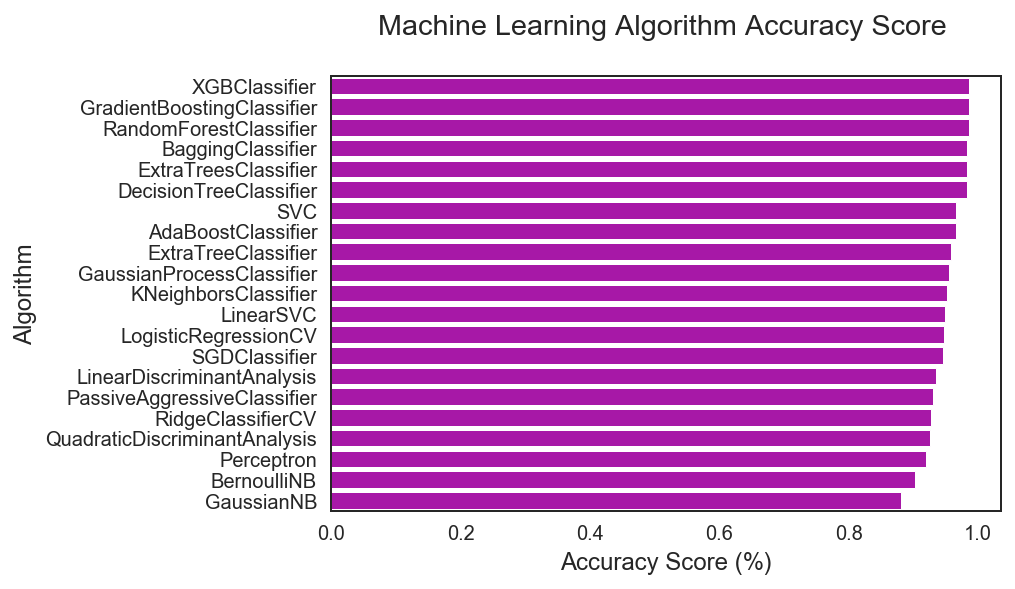

In [51]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

### Section Info

This section compares performance statistics that were achieved in previous section.
As it can be seen, best Models that predicted values with Test accuracy higher than 98.53% are XGBClassifier, Random Forest Classifier and Gradient Boosting Classifier. the rest of algorithms also resulted nice accuracy both on Train and Test datasets. All of algorithms resulted in accuracy higher than 90%,except for GaussianNB which had and accuracy of 88.09% on test dataset.

## 9.2 Correlation With Correct Labels

In [52]:
MLA_predict['Personal Loan'] = y

In [53]:
MLA_predict

{'AdaBoostClassifier': array([0., 0., 1., ..., 0., 0., 0.]),
 'BaggingClassifier': array([0., 0., 1., ..., 0., 0., 0.]),
 'RandomForestClassifier': array([0., 0., 1., ..., 0., 0., 0.]),
 'ExtraTreesClassifier': array([0., 0., 1., ..., 0., 0., 0.]),
 'GradientBoostingClassifier': array([0., 0., 1., ..., 0., 0., 0.]),
 'GaussianProcessClassifier': array([0., 0., 0., ..., 0., 0., 0.]),
 'LogisticRegressionCV': array([0., 0., 0., ..., 0., 0., 0.]),
 'PassiveAggressiveClassifier': array([0., 0., 0., ..., 0., 0., 0.]),
 'RidgeClassifierCV': array([0., 0., 0., ..., 0., 0., 0.]),
 'SGDClassifier': array([0., 0., 0., ..., 0., 0., 0.]),
 'Perceptron': array([0., 0., 0., ..., 0., 0., 0.]),
 'BernoulliNB': array([0., 0., 0., ..., 0., 0., 0.]),
 'GaussianNB': array([1., 0., 0., ..., 0., 0., 0.]),
 'KNeighborsClassifier': array([0., 0., 1., ..., 0., 0., 0.]),
 'SVC': array([0., 0., 0., ..., 0., 0., 0.]),
 'LinearSVC': array([0., 0., 0., ..., 0., 0., 0.]),
 'DecisionTreeClassifier': array([0., 0., 1.

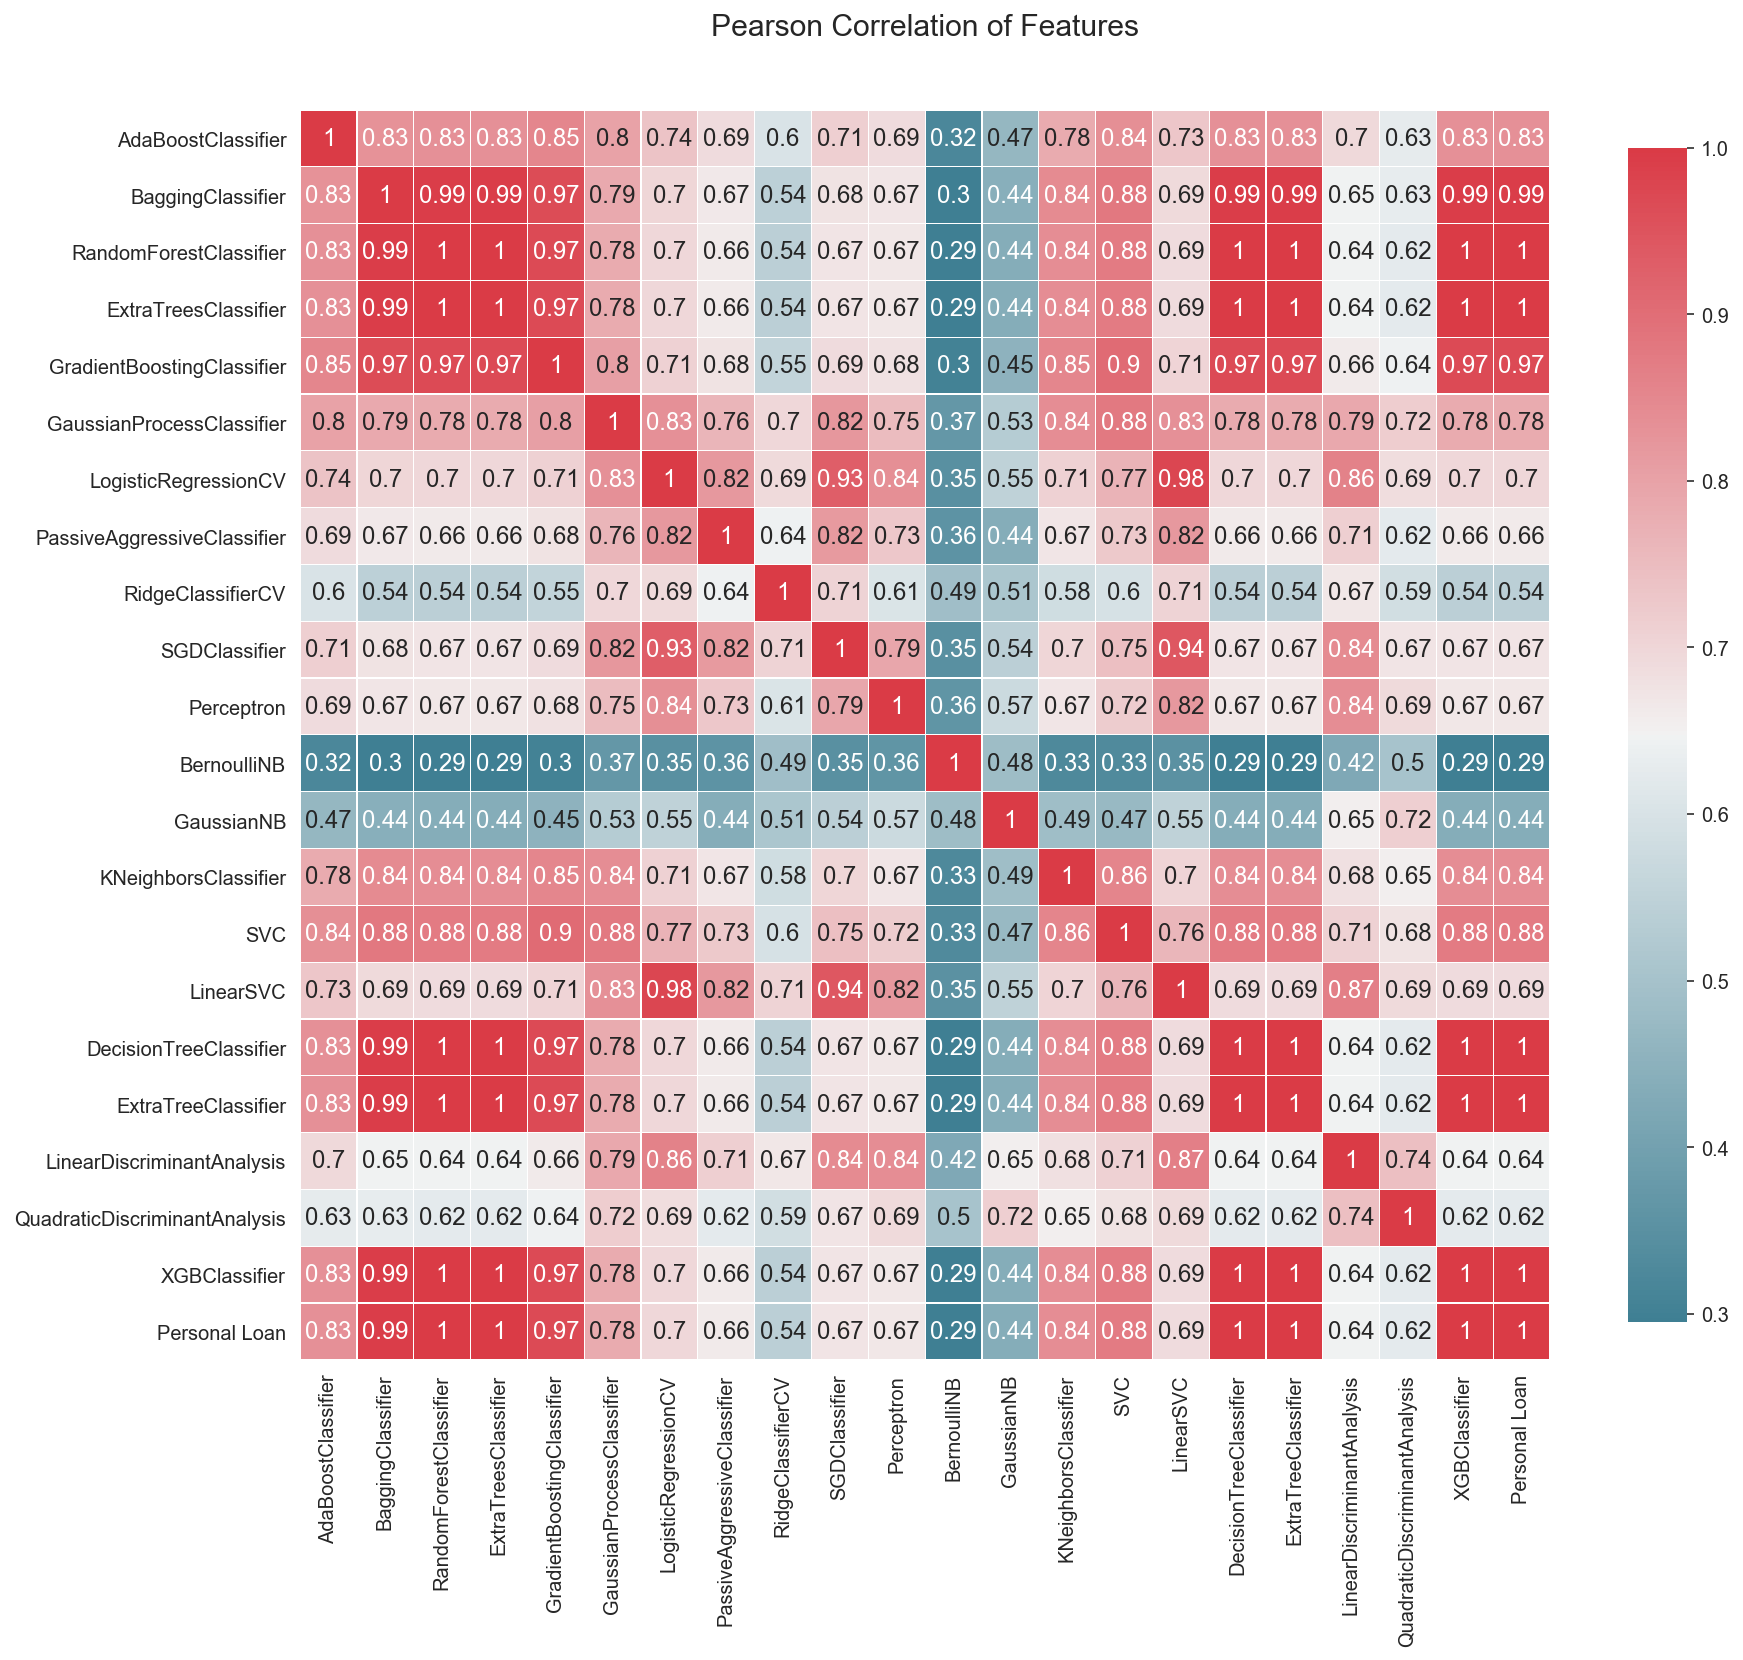

In [54]:
correlation_heatmap(pd.DataFrame(MLA_predict),'pearson')

### Section Info

Correlation checked in this section shows which prediciton labels are close and show the same change as truth labels for Personal Loan. Clear enough, it presents that XGB Classifier, Random Forest Classifier, Extra Trees Classifier, Decision Tree Classifier and Extra Tree Classifier are highly correlated with truth labels by achieving positive correlation of 1.
meanwhile Gradient Boosting Classifier and Bagging Classifier have a high correlation value which is almost close to +1.

By comparing these correlations and accuracy performance that have been claimed inpast section, the two best classifiers for this problem with given dataset are:

1- XGB Classifier

2- Random Forest Classifier 

## 9.3 Confusion Matrix

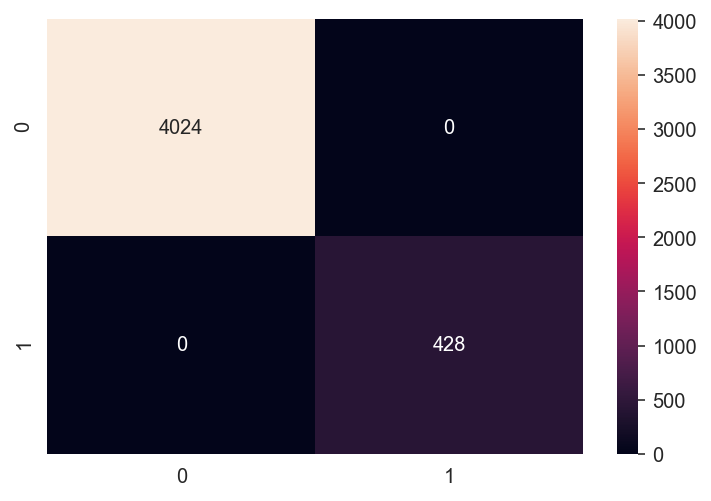

In [55]:
conf_matrix = metrics.confusion_matrix(y_true=MLA_predict['XGBClassifier'], y_pred=MLA_predict['Personal Loan'])
sns.heatmap(conf_matrix, annot = True, fmt='g');

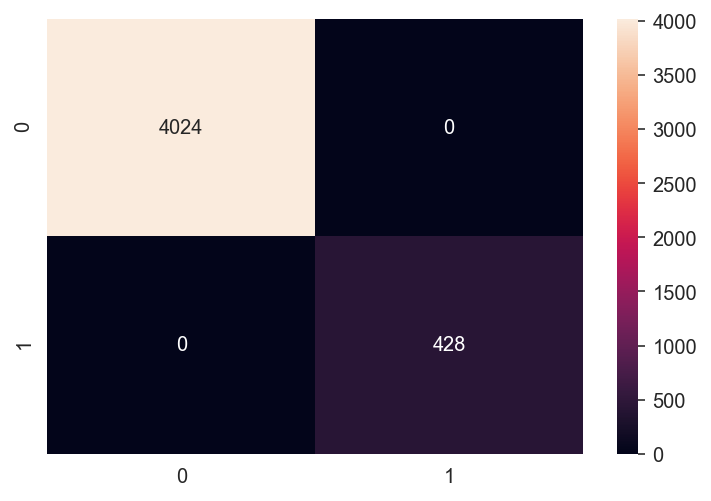

In [56]:
conf_matrix = metrics.confusion_matrix(y_true=MLA_predict['RandomForestClassifier'], y_pred=MLA_predict['Personal Loan'])
sns.heatmap(conf_matrix, annot = True, fmt='g');

### Section Info

This section has visualized the confusion matrix for both XGB Classifier and Random Forest Classifier. they both pose same values.

- True positives = 428
- True negatives = 4024
- False positives = 0
- False negatives = 0

Clearly, all results belong to either True positive or true negative which means these classsifiers had a neat and nice performance.